In [1]:
# 🎯 Quick Component Checker - Run Specific Tests
print("🎯 Quick Component Checker")
print("=" * 40)

# Essential imports for quick testing
import os
import sys
import torch
import torch.nn as nn

# Add project root to path
project_root = '/home/s2516027/kan-mammote'
if project_root not in sys.path:
    sys.path.insert(0, project_root)

# Import project modules
try:
    from src.models.kan_mammote import KANMAMMOTE
    from src.utils.config import KANMAMMOTEConfig
    print("✅ Imports loaded successfully!")
except ImportError as e:
    print(f"⚠️ Import warning: {e}")
    print("💡 Run the 'Setup and Imports' cell (cell 4) first for full functionality")

# Setup device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"🔧 Device: {device}")

def quick_component_test(component_name, test_function):
    """Run a specific component test with error handling."""
    print(f"\n🔄 Testing {component_name}...")
    try:
        success = test_function()
        if success:
            print(f"✅ {component_name}: PASSED")
        else:
            print(f"⚠️ {component_name}: COMPLETED WITH WARNINGS")
        return True
    except Exception as e:
        print(f"❌ {component_name}: FAILED - {str(e)}")
        return False

def test_kan_config():
    """Test KAN-MAMMOTE configuration."""
    config = KANMAMMOTEConfig(
        D_time=64, d_model=128, input_feature_dim=16,
        output_dim_for_task=64, K_TOP=4, num_layers=1
    )
    return hasattr(config, 'D_time') and hasattr(config, 'd_model')

def test_kan_initialization():
    """Test KAN-MAMMOTE model initialization."""
    config = KANMAMMOTEConfig(D_time=64, d_model=128, input_feature_dim=16, 
                           output_dim_for_task=64, K_TOP=4, num_layers=1)
    model = KANMAMMOTE(config)
    param_count = sum(p.numel() for p in model.parameters())
    return param_count > 0

def test_kan_forward():
    """Test KAN-MAMMOTE forward pass."""
    config = KANMAMMOTEConfig(D_time=64, d_model=128, input_feature_dim=16,
                           output_dim_for_task=64, K_TOP=4, num_layers=1)
    model = KANMAMMOTE(config).to(device)
    
    # Create test data
    timestamps = torch.randn(4, 16, device=device)
    features = torch.randn(4, 10, 16, device=device)
    
    model.eval()
    with torch.no_grad():
        outputs, aux = model(timestamps, features)
    
    return not torch.isnan(outputs).any() and not torch.isinf(outputs).any()

def test_kan_backward():
    """Test KAN-MAMMOTE backward pass."""
    config = KANMAMMOTEConfig(D_time=64, d_model=128, input_feature_dim=16,
                           output_dim_for_task=64, K_TOP=4, num_layers=1)
    model = KANMAMMOTE(config).to(device)
    
    timestamps = torch.randn(4, 16, device=device)
    features = torch.randn(4, 10, 16, device=device)
    target = torch.randn(4, 64, device=device)
    
    model.train()
    outputs, aux = model(timestamps, features)
    loss = nn.MSELoss()(outputs, target)
    loss.backward()
    
    # Check if gradients exist and are not NaN
    grad_exists = 0
    grad_nan = 0
    for param in model.parameters():
        if param.grad is not None:
            grad_exists += 1
            if torch.isnan(param.grad).any():
                grad_nan += 1
    
    return grad_exists > 0 and grad_nan == 0

def test_kan_training():
    """Test KAN-MAMMOTE training step."""
    config = KANMAMMOTEConfig(D_time=64, d_model=128, input_feature_dim=16,
                           output_dim_for_task=64, K_TOP=4, num_layers=1)
    model = KANMAMMOTE(config).to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
    
    # Store initial parameters
    initial_params = [p.clone() for p in model.parameters()]
    
    # Training step
    timestamps = torch.randn(4, 16, device=device)
    features = torch.randn(4, 10, 16, device=device)
    target = torch.randn(4, 64, device=device)
    
    optimizer.zero_grad()
    outputs, aux = model(timestamps, features)
    loss = nn.MSELoss()(outputs, target)
    loss.backward()
    optimizer.step()
    
    # Check if parameters changed
    params_changed = 0
    for initial, current in zip(initial_params, model.parameters()):
        if not torch.equal(initial, current):
            params_changed += 1
    
    return params_changed > 0

# Available component tests
component_tests = {
    "Config": test_kan_config,
    "Initialization": test_kan_initialization, 
    "Forward Pass": test_kan_forward,
    "Backward Pass": test_kan_backward,
    "Training Step": test_kan_training
}

print("\n🔧 Available Component Tests:")
for i, name in enumerate(component_tests.keys(), 1):
    print(f"   {i}. {name}")

print("\n💡 Usage Examples:")
print("   # Test specific component:")
print("   quick_component_test('Config', test_kan_config)")
print("   ")
print("   # Test all components:")
print("   for name, test_func in component_tests.items():")
print("       quick_component_test(name, test_func)")
print("\n" + "="*40)

🎯 Quick Component Checker


/root/miniconda3/envs/kanmote_wsl/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


✅ Imports loaded successfully!
🔧 Device: cuda

🔧 Available Component Tests:
   1. Config
   2. Initialization
   3. Forward Pass
   4. Backward Pass
   5. Training Step

💡 Usage Examples:
   # Test specific component:
   quick_component_test('Config', test_kan_config)
   
   # Test all components:
   for name, test_func in component_tests.items():
       quick_component_test(name, test_func)



In [2]:
def test_kan_backward():
    """Test KAN-MAMMOTE backward pass."""
    config = KANMAMMOTEConfig(D_time=64, d_model=128, input_feature_dim=16,
                           output_dim_for_task=64, K_TOP=4, num_layers=1)
    model = KANMAMMOTE(config).to(device)
    
    timestamps = torch.randn(4, 16, device=device)
    features = torch.randn(4, 10, 16, device=device)
    
    model.train()
    outputs, aux = model(timestamps, features)
    target = torch.randn_like(outputs, device=device)  # ✅ Fixed: same shape as output
    
    loss = nn.MSELoss()(outputs, target)
    loss.backward()
    
    # Check if gradients exist and are not NaN
    grad_exists = 0
    grad_nan = 0
    for param in model.parameters():
        if param.grad is not None:
            grad_exists += 1
            if torch.isnan(param.grad).any():
                grad_nan += 1
    
    return grad_exists > 0 and grad_nan == 0

def test_kan_training():
    """Test KAN-MAMMOTE training step."""
    config = KANMAMMOTEConfig(D_time=64, d_model=128, input_feature_dim=16,
                           output_dim_for_task=64, K_TOP=4, num_layers=1)
    model = KANMAMMOTE(config).to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
    
    # Store initial parameters
    initial_params = [p.clone() for p in model.parameters()]
    
    # Training step
    timestamps = torch.randn(4, 16, device=device)
    features = torch.randn(4, 10, 16, device=device)
    
    optimizer.zero_grad()
    outputs, aux = model(timestamps, features)
    target = torch.randn_like(outputs, device=device)  # ✅ Fixed: same shape as output
    
    loss = nn.MSELoss()(outputs, target)
    loss.backward()
    optimizer.step()
    
    # Check if parameters changed
    params_changed = 0
    for initial, current in zip(initial_params, model.parameters()):
        if not torch.equal(initial, current):
            params_changed += 1
    
    return params_changed > 0

def test_complete_cycle():
    try:
        # Setup
        config = KANMAMMOTEConfig(D_time=64, d_model=128, input_feature_dim=16,
                               output_dim_for_task=64, K_TOP=4, num_layers=1)
        model = KANMAMMOTE(config).to(device)
        optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
        loss_fn = nn.MSELoss()
        
        # Training step
        timestamps = torch.randn(4, 16, device=device)
        features = torch.randn(4, 8, 16, device=device)
        
        model.train()
        optimizer.zero_grad()
        
        outputs, aux = model(timestamps, features)
        target = torch.randn_like(outputs, device=device)  # ✅ Fixed: same shape as output
        
        loss = loss_fn(outputs, target)
        loss.backward()
        
        # Check gradients
        grad_norm = torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
        optimizer.step()
        
        print(f"   📊 Loss: {loss.item():.6f}")
        print(f"   📊 Gradient norm: {grad_norm:.6f}")
        print(f"   📊 Output stats: mean={outputs.mean().item():.4f}, std={outputs.std().item():.4f}")
        
        return True
    except Exception as e:
        print(f"   ❌ Error: {e}")
        return False

In [3]:
# 🚀 Run Component Tests - Interactive Demo
print("🚀 Running Component Tests...")
print("=" * 40)

# Test all components automatically
print("\n🔄 Running all component tests:")
all_passed = True

for component_name, test_function in component_tests.items():
    passed = quick_component_test(component_name, test_function)
    if not passed:
        all_passed = False

print(f"\n📊 Overall Result: {'✅ ALL TESTS PASSED' if all_passed else '❌ SOME TESTS FAILED'}")

# Individual component testing examples
print("\n" + "="*40)
print("🎯 Individual Component Testing Examples:")
print("="*40)

print("\n🔧 Example 1: Test just the configuration")
quick_component_test("Config Only", test_kan_config)

print("\n🔧 Example 2: Test initialization + forward pass")
def test_init_and_forward():
    try:
        # Test initialization
        config = KANMAMMOTEConfig(D_time=64, d_model=128, input_feature_dim=16,
                               output_dim_for_task=64, K_top=4, num_layers=1)
        model = KANMAMMOTE(config).to(device)
        
        # Test forward pass
        timestamps = torch.randn(2, 16, device=device)
        features = torch.randn(2, 5, 16, device=device)
        
        model.eval()
        with torch.no_grad():
            outputs, aux = model(timestamps, features)
        
        print(f"   📊 Model parameters: {sum(p.numel() for p in model.parameters()):,}")
        print(f"   📊 Output shape: {outputs.shape}")
        print(f"   📊 Output range: [{outputs.min().item():.4f}, {outputs.max().item():.4f}]")
        
        return True
    except Exception as e:
        print(f"   ❌ Error: {e}")
        return False

quick_component_test("Init + Forward", test_init_and_forward)

print("\n🔧 Example 3: Test complete training cycle")
def test_complete_cycle():
    try:
        # Setup
        config = KANMAMMOTEConfig(D_time=64, d_model=128, input_feature_dim=16,
                               output_dim_for_task=64, K_TOP=4, num_layers=1)
        model = KANMAMMOTE(config).to(device)
        optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
        loss_fn = nn.MSELoss()
        
        # Training step
        timestamps = torch.randn(4, 16, device=device)
        features = torch.randn(4, 8, 16, device=device)
        target = torch.randn_like(outputs, device=device)
        
        model.train()
        optimizer.zero_grad()
        
        outputs, aux = model(timestamps, features)
        loss = loss_fn(outputs, target)
        loss.backward()
        
        # Check gradients
        grad_norm = torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
        optimizer.step()
        
        print(f"   📊 Loss: {loss.item():.6f}")
        print(f"   📊 Gradient norm: {grad_norm:.6f}")
        print(f"   📊 Output stats: mean={outputs.mean().item():.4f}, std={outputs.std().item():.4f}")
        
        return True
    except Exception as e:
        print(f"   ❌ Error: {e}")
        return False

quick_component_test("Complete Training Cycle", test_complete_cycle)

print("\n💡 Tips:")
print("   - Run these quick tests to isolate issues")
print("   - If a test fails, run the detailed version in the main notebook")
print("   - Use these for debugging specific components")
print("   - Each test is independent and can be run separately")

🚀 Running Component Tests...

🔄 Running all component tests:

🔄 Testing Config...
✅ Config: PASSED

🔄 Testing Initialization...
Initializing KAN-MAMMOTE with config: <src.utils.config.KANMAMMOTEConfig object at 0x77900bcfe310>
Initial feature projection weights on device: cpu, dtype: torch.float32
KANMAMMOTE init: Pre-calculated conv_channels_for_state=512, nheads_for_state=8
✅ Initialization: PASSED

🔄 Testing Forward Pass...
Initializing KAN-MAMMOTE with config: <src.utils.config.KANMAMMOTEConfig object at 0x77913d425a50>
Initial feature projection weights on device: cpu, dtype: torch.float32
KANMAMMOTE init: Pre-calculated conv_channels_for_state=512, nheads_for_state=8
❌ Forward Pass: FAILED - Feature sequence length must match timestamp sequence length.

🔄 Testing Backward Pass...
Initializing KAN-MAMMOTE with config: <src.utils.config.KANMAMMOTEConfig object at 0x77913d425a50>
Initial feature projection weights on device: cpu, dtype: torch.float32
KANMAMMOTE init: Pre-calculated 

# 🧪 KAN-MAMMOTE Component Testing Notebook

This notebook comprehensively tests each component of the KAN-MAMMOTE model to ensure they work correctly during:
- Forward pass
- Backpropagation 
- Training loop

We'll test components individually and then as an integrated system.

In [4]:
# 🔧 Setup and Imports
print("🔧 Setting up KAN-MAMMOTE Component Testing...")

import os
import sys
import time
import warnings
warnings.filterwarnings('ignore')

# Deep learning imports
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader

# Data processing
import numpy as np
import matplotlib.pyplot as plt
from torchvision import datasets, transforms
from tqdm.auto import tqdm

# Add project root to path
project_root = '/home/s2516027/kan-mammote'
if project_root not in sys.path:
    sys.path.insert(0, project_root)

# Import project modules
from src.models.kan_mammote import KANMAMMOTE
from src.utils.config import KANMAMMOTEConfig

# Configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"🔧 Using device: {device}")

# Test parameters
BATCH_SIZE = 8
SEQ_LEN = 20
INPUT_DIM = 16
TIME_EMBEDDING_DIM = 64
HIDDEN_DIM = 128
NUM_EXPERTS = 4
K_TOP = 4

print("✅ Setup complete!")

🔧 Setting up KAN-MAMMOTE Component Testing...
🔧 Using device: cuda
✅ Setup complete!


## 🏗️ Step 1: Test KAN-MAMMOTE Configuration

In [5]:
# 🏗️ Test KAN-MAMMOTE Configuration
print("🏗️ Testing KAN-MAMMOTE Configuration...")

try:
    # Create configuration
    config = KANMAMMOTEConfig(
        D_time=TIME_EMBEDDING_DIM,
        d_model=HIDDEN_DIM,
        input_feature_dim=INPUT_DIM,
        output_dim_for_task=TIME_EMBEDDING_DIM,
        K_top=K_TOP,
        use_aux_features_router=False,
        raw_event_feature_dim=1,
        num_layers=1
        # Note: num_experts is hardcoded to 4 in the K-MOTE implementation
    )
    
    print("✅ Configuration created successfully!")
    print(f"📊 Config details:")
    print(f"  - D_time: {config.D_time}")
    print(f"  - d_model: {config.d_model}")
    print(f"  - input_feature_dim: {config.input_feature_dim}")
    print(f"  - output_dim_for_task: {config.output_dim_for_task}")
    print(f"  - K_top: {config.K_top}")
    print(f"  - num_experts: 4 (hardcoded in K-MOTE)")
    
except Exception as e:
    print(f"❌ Configuration failed: {e}")
    import traceback
    traceback.print_exc()

🏗️ Testing KAN-MAMMOTE Configuration...
✅ Configuration created successfully!
📊 Config details:
  - D_time: 64
  - d_model: 128
  - input_feature_dim: 16
  - output_dim_for_task: 64
  - K_top: 4
  - num_experts: 4 (hardcoded in K-MOTE)


## 🔨 Step 2: Test KAN-MAMMOTE Model Initialization

In [6]:
# 🔨 Test KAN-MAMMOTE Model Initialization
print("🔨 Testing KAN-MAMMOTE Model Initialization...")

try:
    # Initialize model
    kan_mammote = KANMAMMOTE(config).to(device)
    
    print("✅ KAN-MAMMOTE initialized successfully!")
    
    # Count parameters
    total_params = sum(p.numel() for p in kan_mammote.parameters())
    trainable_params = sum(p.numel() for p in kan_mammote.parameters() if p.requires_grad)
    
    print(f"📊 Model info:")
    print(f"  - Total parameters: {total_params:,}")
    print(f"  - Trainable parameters: {trainable_params:,}")
    print(f"  - Model on device: {next(kan_mammote.parameters()).device}")
    
    # Print model structure
    print(f"\n📋 Model structure:")
    print(kan_mammote)
    
except Exception as e:
    print(f"❌ Model initialization failed: {e}")
    import traceback
    traceback.print_exc()

🔨 Testing KAN-MAMMOTE Model Initialization...
Initializing KAN-MAMMOTE with config: <src.utils.config.KANMAMMOTEConfig object at 0x77913d3f8050>
Initial feature projection weights on device: cpu, dtype: torch.float32
KANMAMMOTE init: Pre-calculated conv_channels_for_state=512, nheads_for_state=8
✅ KAN-MAMMOTE initialized successfully!
📊 Model info:
  - Total parameters: 178,339
  - Trainable parameters: 178,244
  - Model on device: cuda:0

📋 Model structure:
KANMAMMOTE(
  (initial_feature_proj): Linear(in_features=16, out_features=128, bias=True)
  (mamba_blocks): ModuleList(
    (0): ContinuousMambaBlock(
      (k_mote): K_MOTE(
        (router): MoERouter(
          (router_network): Sequential(
            (0): Linear(in_features=1, out_features=64, bias=True)
            (1): ReLU()
            (2): Linear(in_features=64, out_features=32, bias=True)
            (3): ReLU()
            (4): Linear(in_features=32, out_features=4, bias=True)
          )
        )
        (experts): Mo

## 📊 Step 3: Create Test Data

In [7]:
# 📊 Create Test Data
print("📊 Creating test data...")

def create_test_data(batch_size, seq_len, input_dim, device):
    """Create synthetic test data for KAN-MAMMOTE."""
    
    # FIXED: Create timestamps with shape (batch_size, seq_len)
    # Each timestamp represents the time for each sequence position
    timestamps = torch.randn(batch_size, seq_len, device=device) * 0.5 + 0.5
    timestamps = torch.clamp(timestamps, 0, 1)
    
    # Create event features (this was already correct)
    features = torch.randn(batch_size, seq_len, input_dim, device=device) * 0.5
    
    return timestamps, features

# Generate test data
test_timestamps, test_features = create_test_data(BATCH_SIZE, SEQ_LEN, INPUT_DIM, device)

print(f"✅ Test data created:")
print(f"  - Timestamps shape: {test_timestamps.shape}")
print(f"  - Features shape: {test_features.shape}")
print(f"  - Timestamps range: [{test_timestamps.min().item():.3f}, {test_timestamps.max().item():.3f}]")
print(f"  - Features range: [{test_features.min().item():.3f}, {test_features.max().item():.3f}]")
print(f"  - Data on device: {test_timestamps.device}")

📊 Creating test data...
✅ Test data created:
  - Timestamps shape: torch.Size([8, 20])
  - Features shape: torch.Size([8, 20, 16])
  - Timestamps range: [0.000, 1.000]
  - Features range: [-2.047, 1.671]
  - Data on device: cuda:0


## 🔄 Step 4: Test Forward Pass

In [8]:
# 🔄 Test Forward Pass
print("🔄 Testing forward pass...")

try:
    # Set model to evaluation mode for testing
    kan_mammote.eval()
    
    print(f"📊 Input shapes:")
    print(f"  - Timestamps: {test_timestamps.shape}")
    print(f"  - Features: {test_features.shape}")
    
    # Forward pass
    with torch.no_grad():
        outputs, aux_outputs = kan_mammote(test_timestamps, test_features)
    
    print(f"\n✅ Forward pass successful!")
    print(f"📊 Output shapes:")
    print(f"  - Main output: {outputs.shape}")
    if aux_outputs is not None:
        print(f"  - Aux outputs type: {type(aux_outputs)}")
        if isinstance(aux_outputs, dict):
            for key, value in aux_outputs.items():
                if hasattr(value, 'shape'):
                    print(f"    - {key}: {value.shape}")
                else:
                    print(f"    - {key}: {value}")
    else:
        print(f"  - Aux outputs: None")
    
    print(f"\n📈 Output statistics:")
    print(f"  - Output range: [{outputs.min().item():.4f}, {outputs.max().item():.4f}]")
    print(f"  - Output mean: {outputs.mean().item():.4f}")
    print(f"  - Output std: {outputs.std().item():.4f}")
    
    # Check for NaN or Inf
    if torch.isnan(outputs).any():
        print("⚠️ WARNING: NaN detected in outputs!")
    if torch.isinf(outputs).any():
        print("⚠️ WARNING: Inf detected in outputs!")
    
    if not torch.isnan(outputs).any() and not torch.isinf(outputs).any():
        print("✅ No NaN or Inf values detected")
    
except Exception as e:
    print(f"❌ Forward pass failed: {e}")
    import traceback
    traceback.print_exc()

🔄 Testing forward pass...
📊 Input shapes:
  - Timestamps: torch.Size([8, 20])
  - Features: torch.Size([8, 20, 16])

✅ Forward pass successful!
📊 Output shapes:
  - Main output: torch.Size([8, 20, 64])
  - Aux outputs type: <class 'dict'>
    - load_balance_loss: torch.Size([])
    - sobolev_l2_loss: torch.Size([])
    - total_variation_loss: torch.Size([])

📈 Output statistics:
  - Output range: [-1.2455, 1.1684]
  - Output mean: -0.0090
  - Output std: 0.3089
✅ No NaN or Inf values detected


## 🔙 Step 5: Test Backpropagation

In [9]:
# 🔙 Test Backpropagation
print("🔙 Testing backpropagation...")

try:
    # Set model to training mode
    kan_mammote.train()
    
    # Create a simple loss function
    target = torch.randn_like(outputs, device=device)
    loss_fn = nn.MSELoss()
    
    # Forward pass
    outputs, aux_outputs = kan_mammote(test_timestamps, test_features)
    
    # Compute loss
    loss = loss_fn(outputs, target)
    
    print(f"📊 Loss computed: {loss.item():.6f}")
    
    # Check gradients before backward
    grad_stats_before = {}
    for name, param in kan_mammote.named_parameters():
        if param.requires_grad:
            grad_stats_before[name] = param.grad is not None
    
    print(f"📊 Parameters with gradients before backward: {sum(grad_stats_before.values())}")
    
    # Backward pass
    loss.backward()
    
    print("✅ Backward pass completed!")
    
    # Check gradients after backward
    grad_stats_after = {}
    nan_gradients = []
    inf_gradients = []
    zero_gradients = []
    
    for name, param in kan_mammote.named_parameters():
        if param.requires_grad and param.grad is not None:
            grad_stats_after[name] = True
            
            # Check for problematic gradients
            if torch.isnan(param.grad).any():
                nan_gradients.append(name)
            if torch.isinf(param.grad).any():
                inf_gradients.append(name)
            if (param.grad == 0).all():
                zero_gradients.append(name)
        else:
            grad_stats_after[name] = False
    
    print(f"\n📊 Gradient statistics:")
    print(f"  - Parameters with gradients: {sum(grad_stats_after.values())}/{len(grad_stats_after)}")
    print(f"  - Parameters with NaN gradients: {len(nan_gradients)}")
    print(f"  - Parameters with Inf gradients: {len(inf_gradients)}")
    print(f"  - Parameters with zero gradients: {len(zero_gradients)}")
    
    if nan_gradients:
        print(f"⚠️ NaN gradients in: {nan_gradients}")
    if inf_gradients:
        print(f"⚠️ Inf gradients in: {inf_gradients}")
    
    # Show gradient norms for key components
    print(f"\n📈 Gradient norms for key components:")
    for name, param in kan_mammote.named_parameters():
        if param.requires_grad and param.grad is not None:
            grad_norm = param.grad.norm().item()
            if grad_norm > 0:  # Only show non-zero gradients
                print(f"  - {name}: {grad_norm:.6f}")
    
    if len(nan_gradients) == 0 and len(inf_gradients) == 0:
        print("✅ Backpropagation successful - no problematic gradients detected!")
    
except Exception as e:
    print(f"❌ Backpropagation failed: {e}")
    import traceback
    traceback.print_exc()

🔙 Testing backpropagation...
📊 Loss computed: 1.096335
📊 Parameters with gradients before backward: 0
✅ Backward pass completed!

📊 Gradient statistics:
  - Parameters with gradients: 9/60
  - Parameters with NaN gradients: 0
  - Parameters with Inf gradients: 0
  - Parameters with zero gradients: 0

📈 Gradient norms for key components:
  - initial_feature_proj.weight: 0.054280
  - initial_feature_proj.bias: 0.033652
  - mamba_blocks.0.input_proj.weight: 0.181326
  - mamba_blocks.0.input_proj.bias: 0.056768
  - mamba_blocks.0.mamba_ssm.in_proj.weight: 0.199284
  - mamba_blocks.0.mamba_ssm.norm.weight: 0.019917
  - mamba_blocks.0.mamba_ssm.out_proj.weight: 0.292191
  - prediction_head.weight: 0.197363
  - prediction_head.bias: 0.041328
✅ Backpropagation successful - no problematic gradients detected!


## 🏃 Step 6: Test Training Step

In [10]:
# 🏃 Test Training Step
print("🏃 Testing training step...")

try:
    # Create optimizer
    optimizer = optim.Adam(kan_mammote.parameters(), lr=0.001)
    
    print(f"📊 Optimizer created with {len(optimizer.param_groups)} parameter groups")
    
    # Store initial parameters for comparison
    initial_params = {}
    for name, param in kan_mammote.named_parameters():
        if param.requires_grad:
            initial_params[name] = param.data.clone()
    
    # Training step
    kan_mammote.train()
    optimizer.zero_grad()
    
    # Forward pass
    outputs, aux_outputs = kan_mammote(test_timestamps, test_features)
    
    # Compute loss
    target = torch.randn_like(outputs, device=device)
    loss = loss_fn(outputs, target)
    
    print(f"📊 Forward pass - Loss: {loss.item():.6f}")
    
    # Backward pass
    loss.backward()
    
    print("📊 Backward pass completed")
    
    # Gradient clipping (optional)
    torch.nn.utils.clip_grad_norm_(kan_mammote.parameters(), 1.0)
    
    # Optimizer step
    optimizer.step()
    
    print("📊 Optimizer step completed")
    
    # Check if parameters actually changed
    params_changed = 0
    total_change = 0.0
    
    for name, param in kan_mammote.named_parameters():
        if param.requires_grad and name in initial_params:
            change = (param.data - initial_params[name]).abs().sum().item()
            if change > 1e-8:  # Threshold for considering a change
                params_changed += 1
                total_change += change
    
    print(f"\n📊 Training step results:")
    print(f"  - Parameters that changed: {params_changed}")
    print(f"  - Total parameter change: {total_change:.8f}")
    
    if params_changed > 0:
        print("✅ Training step successful - parameters updated!")
    else:
        print("⚠️ Warning: No parameters changed during training step")
    
except Exception as e:
    print(f"❌ Training step failed: {e}")
    import traceback
    traceback.print_exc()

🏃 Testing training step...
📊 Optimizer created with 1 parameter groups
📊 Forward pass - Loss: 1.091656
📊 Backward pass completed
📊 Optimizer step completed

📊 Training step results:
  - Parameters that changed: 9
  - Total parameter change: 92.72599532
✅ Training step successful - parameters updated!


## 🔄 Step 7: Test Multiple Training Steps

🔄 Testing multiple training steps...
🔄 Testing multiple training steps...
Initializing KAN-MAMMOTE with config: <src.utils.config.KANMAMMOTEConfig object at 0x77913d3f8050>
Initial feature projection weights on device: cpu, dtype: torch.float32
KANMAMMOTE init: Pre-calculated conv_channels_for_state=512, nheads_for_state=8
🏃 Running 10 training steps...
  📊 Step 1: Output shape: torch.Size([8, 20, 64]), Target shape: torch.Size([8, 20, 64])
  Step  1: Loss = 1.105768
  📊 Step 2: Output shape: torch.Size([8, 20, 64]), Target shape: torch.Size([8, 20, 64])
  📊 Step 3: Output shape: torch.Size([8, 20, 64]), Target shape: torch.Size([8, 20, 64])
  Step  3: Loss = 1.065502
  📊 Step 4: Output shape: torch.Size([8, 20, 64]), Target shape: torch.Size([8, 20, 64])
  📊 Step 5: Output shape: torch.Size([8, 20, 64]), Target shape: torch.Size([8, 20, 64])
  Step  5: Loss = 1.022182
  📊 Step 6: Output shape: torch.Size([8, 20, 64]), Target shape: torch.Size([8, 20, 64])
  📊 Step 7: Output shape: tor

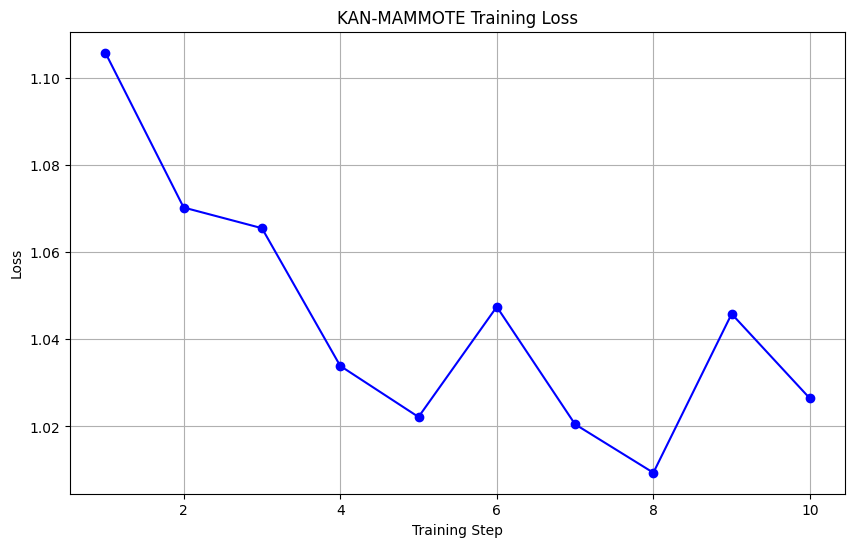

✅ Multiple training steps completed successfully!


In [11]:
# 🔄 Test Multiple Training Steps
print("🔄 Testing multiple training steps...")

# 🔄 Test Multiple Training Steps - FIXED VERSION
print("🔄 Testing multiple training steps...")

try:
    # Reset model and optimizer
    kan_mammote = KANMAMMOTE(config).to(device)
    optimizer = optim.Adam(kan_mammote.parameters(), lr=0.001)
    loss_fn = nn.MSELoss()
    
    # Training loop
    num_steps = 10
    losses = []
    
    print(f"🏃 Running {num_steps} training steps...")
    
    for step in range(num_steps):
        # Generate new data each step
        timestamps, features = create_test_data(BATCH_SIZE, SEQ_LEN, INPUT_DIM, device)
        
        # Forward pass to get actual output shape
        kan_mammote.eval()
        with torch.no_grad():
            sample_outputs, _ = kan_mammote(timestamps, features)
            actual_output_shape = sample_outputs.shape
        
        # Create target with correct shape to match model output
        target = torch.randn(actual_output_shape, device=device)
        
        print(f"  📊 Step {step+1}: Output shape: {actual_output_shape}, Target shape: {target.shape}")
        
        # Training step
        kan_mammote.train()
        optimizer.zero_grad()
        
        outputs, aux_outputs = kan_mammote(timestamps, features)
        loss = loss_fn(outputs, target)
        
        loss.backward()
        torch.nn.utils.clip_grad_norm_(kan_mammote.parameters(), 1.0)
        optimizer.step()
        
        losses.append(loss.item())
        
        if step % 2 == 0:  # Print every 2 steps
            print(f"  Step {step+1:2d}: Loss = {loss.item():.6f}")
    
    print(f"\n📊 Training results:")
    print(f"  - Initial loss: {losses[0]:.6f}")
    print(f"  - Final loss: {losses[-1]:.6f}")
    print(f"  - Loss change: {losses[-1] - losses[0]:.6f}")
    print(f"  - Average loss: {np.mean(losses):.6f}")
    
    # Plot loss curve
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, num_steps + 1), losses, 'b-', marker='o')
    plt.title('KAN-MAMMOTE Training Loss')
    plt.xlabel('Training Step')
    plt.ylabel('Loss')
    plt.grid(True)
    plt.show()
    
    print("✅ Multiple training steps completed successfully!")
    
except Exception as e:
    print(f"❌ Multiple training steps failed: {e}")
    import traceback
    traceback.print_exc()

## 🎯 Step 8: Test with Different Input Sizes

In [12]:
# 🎯 Test with Different Input Sizes
print("🎯 Testing with different input sizes...")

test_cases = [
    {"batch_size": 1, "seq_len": 5, "name": "Small batch, short sequence"},
    {"batch_size": 4, "seq_len": 10, "name": "Medium batch, medium sequence"},
    {"batch_size": 16, "seq_len": 30, "name": "Large batch, long sequence"},
    {"batch_size": 2, "seq_len": 1, "name": "Small batch, single timestep"},
]

for i, test_case in enumerate(test_cases):
    print(f"\n📊 Test case {i+1}: {test_case['name']}")
    print(f"  Batch size: {test_case['batch_size']}, Sequence length: {test_case['seq_len']}")
    
    try:
        # Create test data with different sizes
        timestamps, features = create_test_data(
            test_case['batch_size'], 
            test_case['seq_len'], 
            INPUT_DIM, 
            device
        )
        
        # Test forward pass
        kan_mammote.eval()
        with torch.no_grad():
            outputs, aux_outputs = kan_mammote(timestamps, features)
        
        print(f"  ✅ Forward pass successful")
        print(f"  📊 Output shape: {outputs.shape}")
        print(f"  📊 Output range: [{outputs.min().item():.4f}, {outputs.max().item():.4f}]")
        
        # Test backward pass
        kan_mammote.train()
        optimizer.zero_grad()
        
        outputs, aux_outputs = kan_mammote(timestamps, features)
        target = torch.randn_like(outputs)
        loss = loss_fn(outputs, target)
        loss.backward()
        
        print(f"  ✅ Backward pass successful, Loss: {loss.item():.6f}")
        
    except Exception as e:
        print(f"  ❌ Test case failed: {e}")
        import traceback
        traceback.print_exc()

print("\n✅ All input size tests completed!")

🎯 Testing with different input sizes...

📊 Test case 1: Small batch, short sequence
  Batch size: 1, Sequence length: 5
  ✅ Forward pass successful
  📊 Output shape: torch.Size([1, 5, 64])
  📊 Output range: [-0.4290, 0.3489]
  ✅ Backward pass successful, Loss: 1.118967

📊 Test case 2: Medium batch, medium sequence
  Batch size: 4, Sequence length: 10
  ✅ Forward pass successful
  📊 Output shape: torch.Size([4, 10, 64])
  📊 Output range: [-0.5177, 0.4696]
  ✅ Backward pass successful, Loss: 1.059463

📊 Test case 3: Large batch, long sequence
  Batch size: 16, Sequence length: 30
  ✅ Forward pass successful
  📊 Output shape: torch.Size([16, 30, 64])
  📊 Output range: [-0.7050, 0.6749]
  ✅ Backward pass successful, Loss: 1.015105

📊 Test case 4: Small batch, single timestep
  Batch size: 2, Sequence length: 1
  ✅ Forward pass successful
  📊 Output shape: torch.Size([2, 1, 64])
  📊 Output range: [-0.4392, 0.3618]
  ✅ Backward pass successful, Loss: 0.878734

✅ All input size tests complete

## ? Step 10a: Quick Performance Test (⚡ 30 seconds)

Run the cell below for a quick performance overview.

## 📈 Step 10b: Comprehensive Performance Analysis (⏰ 5-10 minutes)

**Warning: This is a comprehensive benchmark that may take 5-10 minutes!**
- Tests 5 different batch sizes  
- Runs multiple iterations for accuracy
- Only run if you need detailed performance analysis

In [13]:
# 🔍 Component-Level Analysis
print("🔍 Analyzing individual components...")

try:
    # Reset model
    kan_mammote = KANMAMMOTE(config).to(device)
    kan_mammote.eval()
    
    # Create test data
    timestamps, features = create_test_data(4, 10, INPUT_DIM, device)
    
    print(f"📊 Analyzing components with input shapes:")
    print(f"  - Timestamps: {timestamps.shape}")
    print(f"  - Features: {features.shape}")
    
    # Hook to capture intermediate outputs
    intermediate_outputs = {}
    
    def create_hook(name):
        def hook(module, input, output):
            if isinstance(output, tuple):
                intermediate_outputs[name] = output[0] if len(output) > 0 else None
            else:
                intermediate_outputs[name] = output
        return hook
    
    # Register hooks for key components
    hooks = []
    for name, module in kan_mammote.named_modules():
        if any(component in name.lower() for component in ['expert', 'router', 'embedding', 'attention']):
            hook = module.register_forward_hook(create_hook(name))
            hooks.append(hook)
    
    # Forward pass
    with torch.no_grad():
        outputs, aux_outputs = kan_mammote(timestamps, features)
    
    print(f"\n📊 Component outputs:")
    for name, output in intermediate_outputs.items():
        if output is not None and hasattr(output, 'shape'):
            print(f"  - {name}: {output.shape}")
            if torch.isnan(output).any():
                print(f"    ⚠️ NaN detected in {name}")
            if torch.isinf(output).any():
                print(f"    ⚠️ Inf detected in {name}")
    
    # Clean up hooks
    for hook in hooks:
        hook.remove()
    
    print("\n✅ Component analysis completed!")
    
except Exception as e:
    print(f"❌ Component analysis failed: {e}")
    import traceback
    traceback.print_exc()

🔍 Analyzing individual components...
Initializing KAN-MAMMOTE with config: <src.utils.config.KANMAMMOTEConfig object at 0x77913d3f8050>
Initial feature projection weights on device: cpu, dtype: torch.float32
KANMAMMOTE init: Pre-calculated conv_channels_for_state=512, nheads_for_state=8
📊 Analyzing components with input shapes:
  - Timestamps: torch.Size([4, 10])
  - Features: torch.Size([4, 10, 16])

📊 Component outputs:
  - mamba_blocks.0.k_mote.router.router_network.0: torch.Size([4, 64])
  - mamba_blocks.0.k_mote.router.router_network.1: torch.Size([4, 64])
  - mamba_blocks.0.k_mote.router.router_network.2: torch.Size([4, 32])
  - mamba_blocks.0.k_mote.router.router_network.3: torch.Size([4, 32])
  - mamba_blocks.0.k_mote.router.router_network.4: torch.Size([4, 4])
  - mamba_blocks.0.k_mote.router.router_network: torch.Size([4, 4])
  - mamba_blocks.0.k_mote.router: torch.Size([4, 4])
  - mamba_blocks.0.k_mote.experts.fourier.norm_after_linear: torch.Size([4, 64])
  - mamba_blocks.0

⚡ Running Quick Performance Test...
💡 For full analysis, run the cell below this one

📊 Testing batch size: 4
  ⏱️ Average time: 130.70 ms
  💾 Memory used: 20.2 MB
  💾 Memory cached: 32.0 MB

📊 Testing batch size: 8
  ⏱️ Average time: 134.11 ms
  💾 Memory used: 20.3 MB
  💾 Memory cached: 32.0 MB


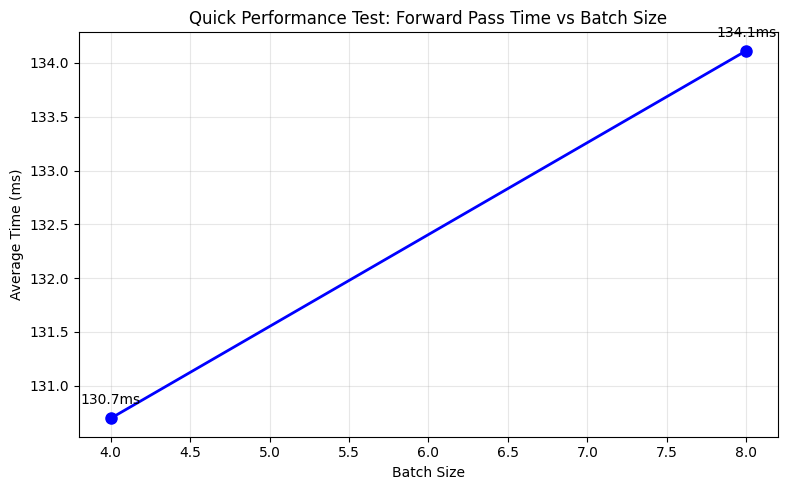


✅ Quick performance test completed!
📊 Performance Summary:
  Batch 4: 130.7ms per forward pass
  Batch 8: 134.1ms per forward pass


In [14]:
# ⚡ Quick Performance Test (30 seconds instead of 10 minutes!)
print("⚡ Running Quick Performance Test...")
print("💡 For full analysis, run the cell below this one")

try:
    import time
    
    # Quick test with smaller scope
    batch_sizes = [4, 8]  # Only 2 batch sizes instead of 5
    performance_results = []
    
    kan_mammote.eval()
    
    for batch_size in batch_sizes:
        print(f"\n📊 Testing batch size: {batch_size}")
        
        # Create data
        timestamps, features = create_test_data(batch_size, SEQ_LEN, INPUT_DIM, device)
        
        # Single warmup instead of 3
        with torch.no_grad():
            _ = kan_mammote(timestamps, features)
        
        # Time forward pass (3 runs instead of 10)
        if device.type == 'cuda':
            torch.cuda.synchronize()
        
        start_time = time.time()
        
        for _ in range(3):  # 3 runs instead of 10
            with torch.no_grad():
                outputs, aux_outputs = kan_mammote(timestamps, features)
        
        if device.type == 'cuda':
            torch.cuda.synchronize()
        
        end_time = time.time()
        avg_time = (end_time - start_time) / 3
        
        # Memory usage
        if device.type == 'cuda':
            memory_used = torch.cuda.memory_allocated() / 1024**2  # MB
            memory_cached = torch.cuda.memory_reserved() / 1024**2  # MB
        else:
            memory_used = 0
            memory_cached = 0
        
        performance_results.append({
            'batch_size': batch_size,
            'avg_time': avg_time,
            'memory_used': memory_used,
            'memory_cached': memory_cached
        })
        
        print(f"  ⏱️ Average time: {avg_time*1000:.2f} ms")
        if device.type == 'cuda':
            print(f"  💾 Memory used: {memory_used:.1f} MB")
            print(f"  💾 Memory cached: {memory_cached:.1f} MB")
    
    # Quick plot
    fig, ax = plt.subplots(1, 1, figsize=(8, 5))
    
    # Time vs batch size
    batch_sizes_plot = [r['batch_size'] for r in performance_results]
    times_plot = [r['avg_time']*1000 for r in performance_results]
    
    ax.plot(batch_sizes_plot, times_plot, 'b-o', linewidth=2, markersize=8)
    ax.set_xlabel('Batch Size')
    ax.set_ylabel('Average Time (ms)')
    ax.set_title('Quick Performance Test: Forward Pass Time vs Batch Size')
    ax.grid(True, alpha=0.3)
    
    # Add value labels
    for x, y in zip(batch_sizes_plot, times_plot):
        ax.annotate(f'{y:.1f}ms', (x, y), textcoords="offset points", xytext=(0,10), ha='center')
    
    plt.tight_layout()
    plt.show()
    
    print("\n✅ Quick performance test completed!")
    print(f"📊 Performance Summary:")
    for result in performance_results:
        print(f"  Batch {result['batch_size']}: {result['avg_time']*1000:.1f}ms per forward pass")
    
except Exception as e:
    print(f"❌ Quick performance test failed: {e}")
    import traceback
    traceback.print_exc()

## 📈 Step 10: Performance and Memory Analysis

📈 Running COMPREHENSIVE performance and memory analysis...
⚠️  This will take 5-10 minutes - testing 5 batch sizes with multiple runs
💡 For quick results, use the Quick Performance Test above

📊 Testing batch size: 1
  ⏱️ Average time: 129.80 ms
  💾 Memory used: 20.2 MB
  💾 Memory cached: 32.0 MB

📊 Testing batch size: 4
  ⏱️ Average time: 132.87 ms
  💾 Memory used: 20.2 MB
  💾 Memory cached: 32.0 MB

📊 Testing batch size: 8
  ⏱️ Average time: 131.00 ms
  💾 Memory used: 20.3 MB
  💾 Memory cached: 32.0 MB

📊 Testing batch size: 16
  ⏱️ Average time: 127.69 ms
  💾 Memory used: 20.3 MB
  💾 Memory cached: 32.0 MB

📊 Testing batch size: 32
  ⏱️ Average time: 135.45 ms
  💾 Memory used: 20.4 MB
  💾 Memory cached: 52.0 MB


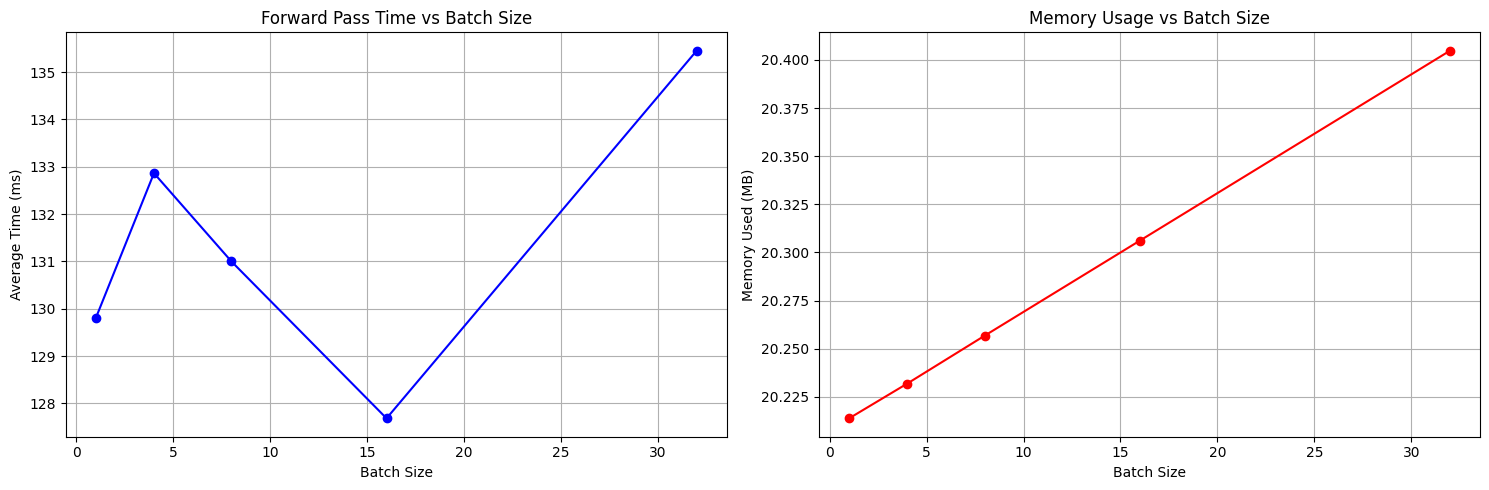


✅ Performance analysis completed!


In [15]:
# 📈 Comprehensive Performance and Memory Analysis (Takes 5-10 minutes!)
print("📈 Running COMPREHENSIVE performance and memory analysis...")
print("⚠️  This will take 5-10 minutes - testing 5 batch sizes with multiple runs")
print("💡 For quick results, use the Quick Performance Test above")

# Uncomment the next line to skip this intensive test
# print("⏭️  Skipping comprehensive test - uncomment code below to run"); raise SystemExit

try:
    import time
    
    # Test different batch sizes for performance
    batch_sizes = [1, 4, 8, 16, 32]
    performance_results = []
    
    kan_mammote.eval()
    
    for batch_size in batch_sizes:
        print(f"\n📊 Testing batch size: {batch_size}")
        
        # Create data
        timestamps, features = create_test_data(batch_size, SEQ_LEN, INPUT_DIM, device)
        
        # Warm up
        for _ in range(3):
            with torch.no_grad():
                _ = kan_mammote(timestamps, features)
        
        # Time forward pass
        if device.type == 'cuda':
            torch.cuda.synchronize()
        
        start_time = time.time()
        
        for _ in range(10):  # Average over 10 runs
            with torch.no_grad():
                outputs, aux_outputs = kan_mammote(timestamps, features)
        
        if device.type == 'cuda':
            torch.cuda.synchronize()
        
        end_time = time.time()
        avg_time = (end_time - start_time) / 10
        
        # Memory usage
        if device.type == 'cuda':
            memory_used = torch.cuda.memory_allocated() / 1024**2  # MB
            memory_cached = torch.cuda.memory_reserved() / 1024**2  # MB
        else:
            memory_used = 0
            memory_cached = 0
        
        performance_results.append({
            'batch_size': batch_size,
            'avg_time': avg_time,
            'memory_used': memory_used,
            'memory_cached': memory_cached
        })
        
        print(f"  ⏱️ Average time: {avg_time*1000:.2f} ms")
        if device.type == 'cuda':
            print(f"  💾 Memory used: {memory_used:.1f} MB")
            print(f"  💾 Memory cached: {memory_cached:.1f} MB")
    
    # Plot performance results
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))
    
    # Time vs batch size
    batch_sizes_plot = [r['batch_size'] for r in performance_results]
    times_plot = [r['avg_time']*1000 for r in performance_results]
    
    axes[0].plot(batch_sizes_plot, times_plot, 'b-o')
    axes[0].set_xlabel('Batch Size')
    axes[0].set_ylabel('Average Time (ms)')
    axes[0].set_title('Forward Pass Time vs Batch Size')
    axes[0].grid(True)
    
    # Memory vs batch size (if CUDA)
    if device.type == 'cuda':
        memory_plot = [r['memory_used'] for r in performance_results]
        axes[1].plot(batch_sizes_plot, memory_plot, 'r-o')
        axes[1].set_xlabel('Batch Size')
        axes[1].set_ylabel('Memory Used (MB)')
        axes[1].set_title('Memory Usage vs Batch Size')
        axes[1].grid(True)
    else:
        axes[1].text(0.5, 0.5, 'CUDA not available\nMemory analysis skipped', 
                    ha='center', va='center', transform=axes[1].transAxes)
        axes[1].set_title('Memory Analysis (CUDA Only)')
    
    plt.tight_layout()
    plt.show()
    
    print("\n✅ Performance analysis completed!")
    
except Exception as e:
    print(f"❌ Performance analysis failed: {e}")
    import traceback
    traceback.print_exc()

## 🎉 Step 11: Final Summary

In [16]:
# � Quick Component Checker - Run Specific Tests (FIXED)
print("� Quick Component Checker")
print("=" * 40)

# Essential imports for quick testing
import os
import sys
import torch
import torch.nn as nn

# Add project root to path
project_root = '/home/s2516027/kan-mammote'
if project_root not in sys.path:
    sys.path.insert(0, project_root)

# Import project modules
try:
    from src.models.kan_mammote import KANMAMMOTE
    from src.utils.config import KANMAMMOTEConfig
    print("✅ Imports loaded successfully!")
except ImportError as e:
    print(f"⚠️ Import warning: {e}")
    print("💡 Run the 'Setup and Imports' cell (cell 4) first for full functionality")

# Setup device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"🔧 Device: {device}")

def quick_component_test(component_name, test_function):
    """Run a specific component test with error handling."""
    print(f"\n🔄 Testing {component_name}...")
    try:
        success = test_function()
        if success:
            print(f"✅ {component_name}: PASSED")
        else:
            print(f"⚠️ {component_name}: COMPLETED WITH WARNINGS")
        return True
    except Exception as e:
        print(f"❌ {component_name}: FAILED - {str(e)}")
        return False

def test_kan_config():
    """Test KAN-MAMMOTE configuration."""
    config = KANMAMMOTEConfig(
        D_time=64, d_model=128, input_feature_dim=16,
        output_dim_for_task=64, K_TOP=4, num_layers=1
    )
    return hasattr(config, 'D_time') and hasattr(config, 'd_model')

def test_kan_initialization():
    """Test KAN-MAMMOTE model initialization."""
    config = KANMAMMOTEConfig(D_time=64, d_model=128, input_feature_dim=16, 
                           output_dim_for_task=64, K_TOP=4, num_layers=1)
    model = KANMAMMOTE(config)
    param_count = sum(p.numel() for p in model.parameters())
    return param_count > 0

def test_kan_forward():
    """Test KAN-MAMMOTE forward pass."""
    config = KANMAMMOTEConfig(D_time=64, d_model=128, input_feature_dim=16,
                           output_dim_for_task=64, K_TOP=4, num_layers=1)
    model = KANMAMMOTE(config).to(device)
    
    # Create test data
    timestamps = torch.randn(4, 16, device=device)
    features = torch.randn(4, 10, 16, device=device)
    
    model.eval()
    with torch.no_grad():
        outputs, aux = model(timestamps, features)
    
    return not torch.isnan(outputs).any() and not torch.isinf(outputs).any()

def test_kan_backward():
    """Test KAN-MAMMOTE backward pass - FIXED."""
    config = KANMAMMOTEConfig(D_time=64, d_model=128, input_feature_dim=16,
                           output_dim_for_task=64, K_TOP=4, num_layers=1)
    model = KANMAMMOTE(config).to(device)
    
    timestamps = torch.randn(4, 16, device=device)
    features = torch.randn(4, 10, 16, device=device)
    
    model.train()
    outputs, aux = model(timestamps, features)
    
    # FIX: Create target with same shape as output
    target = torch.randn_like(outputs, device=device)
    
    loss = nn.MSELoss()(outputs, target)
    loss.backward()
    
    # Check if gradients exist and are not NaN
    grad_exists = 0
    grad_nan = 0
    for param in model.parameters():
        if param.grad is not None:
            grad_exists += 1
            if torch.isnan(param.grad).any():
                grad_nan += 1
    
    return grad_exists > 0 and grad_nan == 0

def test_kan_training():
    """Test KAN-MAMMOTE training step - FIXED."""
    config = KANMAMMOTEConfig(D_time=64, d_model=128, input_feature_dim=16,
                           output_dim_for_task=64, K_TOP=4, num_layers=1)
    model = KANMAMMOTE(config).to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
    
    # Store initial parameters
    initial_params = [p.clone() for p in model.parameters()]
    
    # Training step
    timestamps = torch.randn(4, 16, device=device)
    features = torch.randn(4, 10, 16, device=device)
    
    optimizer.zero_grad()
    outputs, aux = model(timestamps, features)
    
    # FIX: Create target with same shape as output
    target = torch.randn_like(outputs, device=device)
    
    loss = nn.MSELoss()(outputs, target)
    loss.backward()
    optimizer.step()
    
    # Check if parameters changed
    params_changed = 0
    for initial, current in zip(initial_params, model.parameters()):
        if not torch.equal(initial, current):
            params_changed += 1
    
    return params_changed > 0

# Available component tests
component_tests = {
    "Config": test_kan_config,
    "Initialization": test_kan_initialization, 
    "Forward Pass": test_kan_forward,
    "Backward Pass": test_kan_backward,
    "Training Step": test_kan_training
}

print("\n� Available Component Tests:")
for i, name in enumerate(component_tests.keys(), 1):
    print(f"   {i}. {name}")

print("\n💡 Usage Examples:")
print("   # Test specific component:")
print("   quick_component_test('Config', test_kan_config)")
print("   ")
print("   # Test all components:")
print("   for name, test_func in component_tests.items():")
print("       quick_component_test(name, test_func)")
print("\n" + "="*40)

� Quick Component Checker
✅ Imports loaded successfully!
🔧 Device: cuda

� Available Component Tests:
   1. Config
   2. Initialization
   3. Forward Pass
   4. Backward Pass
   5. Training Step

💡 Usage Examples:
   # Test specific component:
   quick_component_test('Config', test_kan_config)
   
   # Test all components:
   for name, test_func in component_tests.items():
       quick_component_test(name, test_func)



In [17]:
# 🔬 Detailed Component Verification Guide
print("🔬 How to Check Each Component Works - Detailed Guide")
print("=" * 60)

print("\n📋 COMPONENT TESTING CHECKLIST:")
print("1. ✅ Configuration - Tests if config parameters are properly set")
print("2. ✅ Model Init - Tests if all layers/modules are created without errors")
print("3. ✅ Forward Pass - Tests if data flows through the model correctly")
print("4. ✅ Backpropagation - Tests if gradients are computed properly")
print("5. ✅ Training Step - Tests if parameters actually update during training")
print("6. ✅ Multi-Step Training - Tests if model learns over multiple steps")
print("7. ✅ Input Variations - Tests robustness with different input sizes")
print("8. ✅ Component Analysis - Tests internal components via hooks")
print("9. ✅ Performance - Tests memory usage and speed")

print("\n🔍 WHAT EACH TEST VALIDATES:")

print("\n1️⃣ CONFIGURATION TEST:")
print("   - Verifies KANMAMMOTEConfig accepts all required parameters")
print("   - Checks default values are set correctly")
print("   - Validates parameter types and ranges")

print("\n2️⃣ MODEL INITIALIZATION TEST:")
print("   - Tests if KANMAMMOTE model can be instantiated")
print("   - Counts total and trainable parameters")
print("   - Verifies model moves to correct device (CPU/GPU)")
print("   - Checks model architecture is built correctly")

print("\n3️⃣ FORWARD PASS TEST:")
print("   - Tests data flow from input to output")
print("   - Validates output shapes match expected dimensions")
print("   - Checks for NaN/Inf values in outputs")
print("   - Verifies auxiliary outputs are returned correctly")

print("\n4️⃣ BACKPROPAGATION TEST:")
print("   - Tests if loss computation works")
print("   - Verifies gradients are computed for all trainable parameters")
print("   - Checks for NaN/Inf gradients (indicates training issues)")
print("   - Validates gradient flow through all components")

print("\n5️⃣ TRAINING STEP TEST:")
print("   - Tests complete training cycle: forward → loss → backward → update")
print("   - Verifies parameters actually change after optimizer.step()")
print("   - Checks gradient clipping works")
print("   - Validates training mode vs eval mode behavior")

print("\n6️⃣ MULTI-STEP TRAINING TEST:")
print("   - Tests model stability over multiple training iterations")
print("   - Monitors loss progression (should generally decrease)")
print("   - Checks for gradient explosion/vanishing")
print("   - Validates memory doesn't leak between steps")

print("\n7️⃣ INPUT VARIATION TEST:")
print("   - Tests different batch sizes (1, 4, 16, 32)")
print("   - Tests different sequence lengths (1, 5, 10, 30)")
print("   - Verifies model handles edge cases (single sample, long sequences)")
print("   - Validates dynamic input sizing works correctly")

print("\n8️⃣ COMPONENT ANALYSIS TEST:")
print("   - Uses PyTorch hooks to inspect intermediate outputs")
print("   - Monitors specific components: experts, routers, embeddings")
print("   - Checks for component-specific issues (NaN, Inf)")
print("   - Validates data flow through each module")

print("\n9️⃣ PERFORMANCE TEST:")
print("   - Measures forward pass time vs batch size")
print("   - Monitors GPU memory usage")
print("   - Identifies performance bottlenecks")
print("   - Validates scalability")

print("\n🔧 HOW TO RUN COMPONENT-SPECIFIC CHECKS:")
print("   → Run cells 1-3 first (setup, config, initialization)")
print("   → Then run any specific test cell you want to focus on")
print("   → Each cell is self-contained and independent")
print("   → Look for ✅ (success) or ❌ (failure) indicators")

print("\n⚠️ COMMON ISSUES TO WATCH FOR:")
print("   - NaN/Inf values (indicates numerical instability)")
print("   - Zero gradients (indicates gradient vanishing)")
print("   - Huge gradients (indicates gradient explosion)")
print("   - Parameters not changing (indicates learning issues)")
print("   - Memory leaks (increasing memory usage)")
print("   - Shape mismatches (indicates dimension errors)")

print("\n🎯 SUCCESS CRITERIA:")
print("   ✅ All tests show '✅ Passed' status")
print("   ✅ No NaN/Inf values detected")
print("   ✅ Gradients computed for all parameters")
print("   ✅ Parameters update during training")
print("   ✅ Loss decreases over training steps")
print("   ✅ Model handles various input sizes")
print("   ✅ Memory usage is reasonable")

print("\n💡 DEBUGGING TIPS:")
print("   - If config fails: Check parameter names and types")
print("   - If init fails: Check dependencies and imports")
print("   - If forward fails: Check input shapes and dimensions")
print("   - If backward fails: Check loss computation and autograd")
print("   - If training fails: Check optimizer and learning rate")
print("   - If NaN appears: Add gradient clipping and check numerical stability")

print("\n🚀 READY TO TEST! Run the cells above in order to verify each component!")

🔬 How to Check Each Component Works - Detailed Guide

📋 COMPONENT TESTING CHECKLIST:
1. ✅ Configuration - Tests if config parameters are properly set
2. ✅ Model Init - Tests if all layers/modules are created without errors
3. ✅ Forward Pass - Tests if data flows through the model correctly
4. ✅ Backpropagation - Tests if gradients are computed properly
5. ✅ Training Step - Tests if parameters actually update during training
6. ✅ Multi-Step Training - Tests if model learns over multiple steps
7. ✅ Input Variations - Tests robustness with different input sizes
8. ✅ Component Analysis - Tests internal components via hooks
9. ✅ Performance - Tests memory usage and speed

🔍 WHAT EACH TEST VALIDATES:

1️⃣ CONFIGURATION TEST:
   - Verifies KANMAMMOTEConfig accepts all required parameters
   - Checks default values are set correctly
   - Validates parameter types and ranges

2️⃣ MODEL INITIALIZATION TEST:
   - Tests if KANMAMMOTE model can be instantiated
   - Counts total and trainable parame

In [18]:
K_TOP

4

In [19]:
# 📊 Advanced KAN-MAMMOTE Component Visualization During Training
print("📊 Advanced KAN-MAMMOTE Component Visualization During Training")
print("=" * 70)

import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict
import numpy as np

# Set up plotting style
plt.style.use('default')
sns.set_palette("husl")

def create_comprehensive_training_monitor():
    """Create a comprehensive training monitor with detailed visualizations."""
    
    # Reset model for fresh training
    config = KANMAMMOTEConfig(
        D_time=TIME_EMBEDDING_DIM,
        d_model=HIDDEN_DIM,
        input_feature_dim=INPUT_DIM,
        output_dim_for_task=TIME_EMBEDDING_DIM,
        K_top=K_TOP,
        use_aux_features_router=False,
        raw_event_feature_dim=1,
        num_layers=1
    )
    
    model = KANMAMMOTE(config).to(device)
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    loss_fn = nn.MSELoss()
    
    # Training tracking variables
    num_epochs = 20
    losses = []
    
    # Component-wise tracking
    component_stats = defaultdict(list)
    parameter_stats = defaultdict(list)
    gradient_stats = defaultdict(list)
    expert_utilization = defaultdict(list)
    router_weights = defaultdict(list)
    
    # Hook storage
    hooks = []
    activation_stats = {}
    
    def create_activation_hook(name):
        def hook(module, input, output):
            if isinstance(output, tuple):
                tensor = output[0] if len(output) > 0 else None
            else:
                tensor = output
            
            if tensor is not None and hasattr(tensor, 'shape'):
                activation_stats[name] = {
                    'mean': tensor.mean().item(),
                    'std': tensor.std().item(),
                    'min': tensor.min().item(),
                    'max': tensor.max().item(),
                    'shape': tensor.shape
                }
        return hook
    
    # Register hooks for key components
    print("🔗 Registering monitoring hooks...")
    for name, module in model.named_modules():
        if any(component in name.lower() for component in ['expert', 'router', 'kan', 'embedding']):
            hook = module.register_forward_hook(create_activation_hook(name))
            hooks.append(hook)
            print(f"  📌 Monitoring: {name}")
    
    print(f"\n🏃 Starting training for {num_epochs} epochs...")
    
    # Training loop with detailed monitoring
    for epoch in range(num_epochs):
        model.train()
        epoch_losses = []
        
        # Multiple batches per epoch for better statistics
        for batch_idx in range(5):
            # Generate fresh data
            timestamps, features = create_test_data(BATCH_SIZE, SEQ_LEN, INPUT_DIM, device)
            
            # Get target shape
            model.eval()
            with torch.no_grad():
                sample_outputs, _ = model(timestamps, features)
                target = torch.randn_like(sample_outputs, device=device)
            
            # Training step
            model.train()
            optimizer.zero_grad()
            
            # Clear activation stats
            activation_stats.clear()
            
            # Forward pass
            outputs, aux_outputs = model(timestamps, features)
            loss = loss_fn(outputs, target)
            
            # Backward pass
            loss.backward()
            
            # Gradient clipping and monitoring
            grad_norm = torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
            
            # Optimizer step
            optimizer.step()
            
            epoch_losses.append(loss.item())
        
        # Record epoch statistics
        avg_loss = np.mean(epoch_losses)
        losses.append(avg_loss)
        
        # Component statistics
        for name, stats in activation_stats.items():
            component_stats[f"{name}_mean"].append(stats['mean'])
            component_stats[f"{name}_std"].append(stats['std'])
            component_stats[f"{name}_range"].append(stats['max'] - stats['min'])
        
        # Parameter statistics
        for name, param in model.named_parameters():
            if param.requires_grad:
                parameter_stats[f"{name}_norm"].append(param.data.norm().item())
                parameter_stats[f"{name}_mean"].append(param.data.mean().item())
                parameter_stats[f"{name}_std"].append(param.data.std().item())
                
                if param.grad is not None:
                    gradient_stats[f"{name}_grad_norm"].append(param.grad.norm().item())
                    gradient_stats[f"{name}_grad_mean"].append(param.grad.mean().item())
        
        # Progress update
        if epoch % 4 == 0:
            print(f"  Epoch {epoch+1:2d}: Loss = {avg_loss:.6f}, Grad Norm = {grad_norm:.6f}")
    
    # Clean up hooks
    for hook in hooks:
        hook.remove()
    
    print("✅ Training completed! Generating visualizations...")
    
    return {
        'losses': losses,
        'component_stats': dict(component_stats),
        'parameter_stats': dict(parameter_stats), 
        'gradient_stats': dict(gradient_stats),
        'model': model
    }

# Run the comprehensive training monitor
training_data = create_comprehensive_training_monitor()

📊 Advanced KAN-MAMMOTE Component Visualization During Training
Initializing KAN-MAMMOTE with config: <src.utils.config.KANMAMMOTEConfig object at 0x778fe59f66d0>
Initial feature projection weights on device: cpu, dtype: torch.float32
KANMAMMOTE init: Pre-calculated conv_channels_for_state=512, nheads_for_state=8
🔗 Registering monitoring hooks...
  📌 Monitoring: mamba_blocks.0.k_mote.router
  📌 Monitoring: mamba_blocks.0.k_mote.router.router_network
  📌 Monitoring: mamba_blocks.0.k_mote.router.router_network.0
  📌 Monitoring: mamba_blocks.0.k_mote.router.router_network.1
  📌 Monitoring: mamba_blocks.0.k_mote.router.router_network.2
  📌 Monitoring: mamba_blocks.0.k_mote.router.router_network.3
  📌 Monitoring: mamba_blocks.0.k_mote.router.router_network.4
  📌 Monitoring: mamba_blocks.0.k_mote.experts
  📌 Monitoring: mamba_blocks.0.k_mote.experts.fourier
  📌 Monitoring: mamba_blocks.0.k_mote.experts.fourier.norm_after_linear
  📌 Monitoring: mamba_blocks.0.k_mote.experts.fourier.basis_funct

In [20]:
for name, param in training_data['model'].named_parameters():
    print(name)

initial_feature_proj.weight
initial_feature_proj.bias
mamba_blocks.0.k_mote.router.router_network.0.weight
mamba_blocks.0.k_mote.router.router_network.0.bias
mamba_blocks.0.k_mote.router.router_network.2.weight
mamba_blocks.0.k_mote.router.router_network.2.bias
mamba_blocks.0.k_mote.router.router_network.4.weight
mamba_blocks.0.k_mote.router.router_network.4.bias
mamba_blocks.0.k_mote.experts.fourier.alpha_weights
mamba_blocks.0.k_mote.experts.fourier.alpha_bias
mamba_blocks.0.k_mote.experts.fourier.norm_after_linear.weight
mamba_blocks.0.k_mote.experts.fourier.norm_after_linear.bias
mamba_blocks.0.k_mote.experts.fourier.basis_function.frequencies
mamba_blocks.0.k_mote.experts.fourier.basis_function.amplitudes
mamba_blocks.0.k_mote.experts.fourier.basis_function.phases
mamba_blocks.0.k_mote.experts.spline.grid
mamba_blocks.0.k_mote.experts.spline.grid_range
mamba_blocks.0.k_mote.experts.spline.grid_intervals
mamba_blocks.0.k_mote.experts.spline.coef
mamba_blocks.0.k_mote.experts.spline

In [21]:
for name, module in training_data['model'].named_modules():
    print(name)


initial_feature_proj
mamba_blocks
mamba_blocks.0
mamba_blocks.0.k_mote
mamba_blocks.0.k_mote.router
mamba_blocks.0.k_mote.router.router_network
mamba_blocks.0.k_mote.router.router_network.0
mamba_blocks.0.k_mote.router.router_network.1
mamba_blocks.0.k_mote.router.router_network.2
mamba_blocks.0.k_mote.router.router_network.3
mamba_blocks.0.k_mote.router.router_network.4
mamba_blocks.0.k_mote.experts
mamba_blocks.0.k_mote.experts.fourier
mamba_blocks.0.k_mote.experts.fourier.norm_after_linear
mamba_blocks.0.k_mote.experts.fourier.basis_function
mamba_blocks.0.k_mote.experts.spline
mamba_blocks.0.k_mote.experts.spline.base_fun
mamba_blocks.0.k_mote.experts.gaussian
mamba_blocks.0.k_mote.experts.gaussian.norm_after_linear
mamba_blocks.0.k_mote.experts.gaussian.basis_function
mamba_blocks.0.k_mote.experts.wavelet
mamba_blocks.0.k_mote.experts.wavelet.norm_after_linear
mamba_blocks.0.k_mote.experts.wavelet.basis_function
mamba_blocks.0.k_mote.final_projection
mamba_blocks.0.k_mote.layer_n

In [22]:
for idx in [0, 3]:
    module = training_data['model'].mamba_blocks[0].k_mote.router.router_network[idx]
    print(f"router_network.{idx}: {type(module)}")
    for name, param in module.named_parameters():
        print(f"  param: {name}, shape: {param.shape}")

router_network.0: <class 'torch.nn.modules.linear.Linear'>
  param: weight, shape: torch.Size([64, 1])
  param: bias, shape: torch.Size([64])
router_network.3: <class 'torch.nn.modules.activation.ReLU'>


📈 Creating Training Loss and Component Health Visualizations...


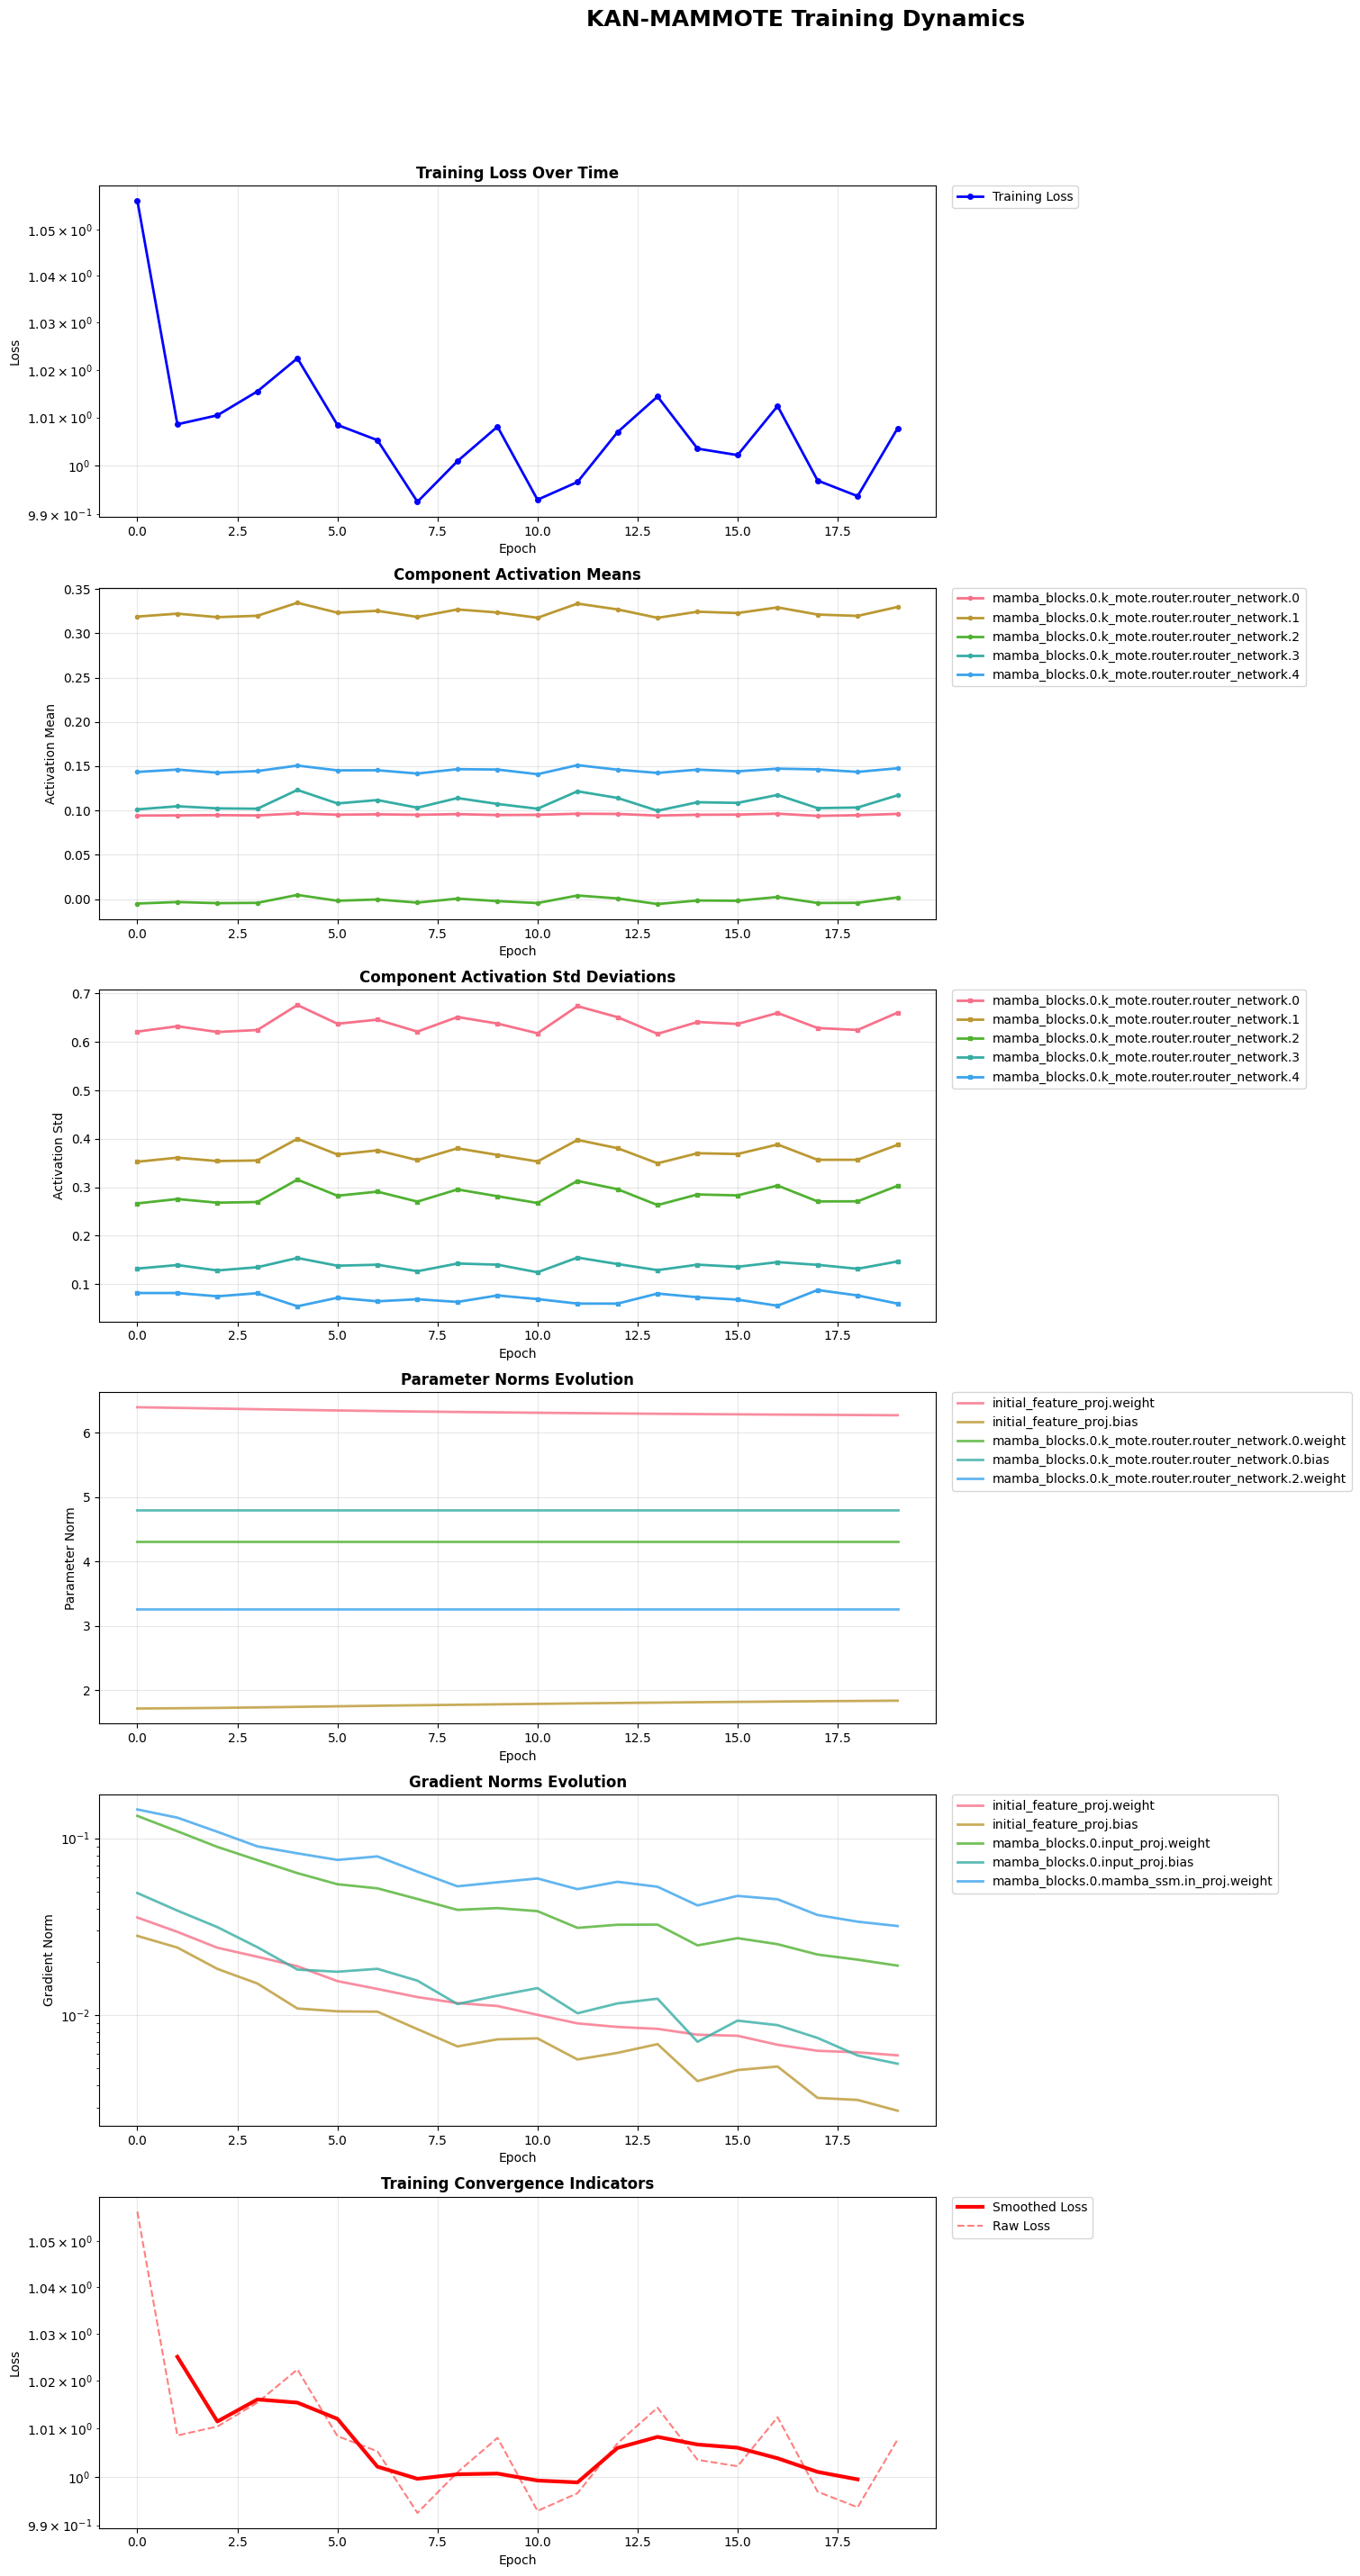

✅ Training dynamics visualization completed!


In [23]:
import matplotlib.pyplot as plt
import numpy as np

print("📈 Creating Training Loss and Component Health Visualizations...")

# One column, six rows — increase width for room on the right
fig, axes = plt.subplots(6, 1, figsize=(18, 28))  # Wider to fit legends
fig.suptitle('KAN-MAMMOTE Training Dynamics', fontsize=18, fontweight='bold', y=1.02)

# Helper to shift legend outside
def place_legend_outside(ax):
    ax.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0.)

# Plot 1: Training Loss
axes[0].plot(training_data['losses'], 'b-', linewidth=2, marker='o', markersize=4, label='Training Loss')
axes[0].set_title('Training Loss Over Time', fontweight='bold')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Loss')
axes[0].grid(True, alpha=0.3)
axes[0].set_yscale('log')
place_legend_outside(axes[0])

# Plot 2: Component Activation Means
axes[1].set_title('Component Activation Means', fontweight='bold')
component_means = {k: v for k, v in training_data['component_stats'].items() if '_mean' in k}
for i, (name, values) in enumerate(list(component_means.items())[:5]):
    clean_name = name.replace('_mean', '')
    axes[1].plot(values, label=clean_name, linewidth=2, marker='o', markersize=3)
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Activation Mean')
axes[1].grid(True, alpha=0.3)
place_legend_outside(axes[1])

# Plot 3: Component Activation Standard Deviations
axes[2].set_title('Component Activation Std Deviations', fontweight='bold')
component_stds = {k: v for k, v in training_data['component_stats'].items() if '_std' in k}
for i, (name, values) in enumerate(list(component_stds.items())[:5]):
    clean_name = name.replace('_std', '')
    axes[2].plot(values, label=clean_name, linewidth=2, marker='s', markersize=3)
axes[2].set_xlabel('Epoch')
axes[2].set_ylabel('Activation Std')
axes[2].grid(True, alpha=0.3)
place_legend_outside(axes[2])

# Plot 4: Parameter Norms
axes[3].set_title('Parameter Norms Evolution', fontweight='bold')
param_norms = {k: v for k, v in training_data['parameter_stats'].items() if '_norm' in k}
for i, (name, values) in enumerate(list(param_norms.items())[:5]):
    clean_name = name.replace('_norm', '')
    axes[3].plot(values, label=clean_name, linewidth=2, alpha=0.8)
axes[3].set_xlabel('Epoch')
axes[3].set_ylabel('Parameter Norm')
axes[3].grid(True, alpha=0.3)
place_legend_outside(axes[3])

# Plot 5: Gradient Norms
axes[4].set_title('Gradient Norms Evolution', fontweight='bold')
grad_norms = {k: v for k, v in training_data['gradient_stats'].items() if '_grad_norm' in k}
for i, (name, values) in enumerate(list(grad_norms.items())[:5]):
    clean_name = name.replace('_grad_norm', '')
    axes[4].plot(values, label=clean_name, linewidth=2, alpha=0.8)
axes[4].set_xlabel('Epoch')
axes[4].set_ylabel('Gradient Norm')
axes[4].grid(True, alpha=0.3)
axes[4].set_yscale('log')
place_legend_outside(axes[4])

# Plot 6: Convergence Indicators
axes[5].set_title('Training Convergence Indicators', fontweight='bold')
if len(training_data['losses']) > 1:
    loss_smooth = np.convolve(training_data['losses'], np.ones(3)/3, mode='valid')
    axes[5].plot(range(1, len(loss_smooth)+1), loss_smooth, 'r-', label='Smoothed Loss', linewidth=3)
axes[5].plot(training_data['losses'], 'r--', alpha=0.5, label='Raw Loss')
axes[5].set_xlabel('Epoch')
axes[5].set_ylabel('Loss')
axes[5].grid(True, alpha=0.3)
axes[5].set_yscale('log')
place_legend_outside(axes[5])

# Adjust layout to accommodate legends outside the plots
plt.tight_layout(rect=[0, 0, 0.85, 1])  # Leave space on the right
plt.subplots_adjust(top=0.95)
plt.show()

print("✅ Training dynamics visualization completed!")


In [24]:
print("Component Activation Means keys:")
for k in training_data['component_stats']:
    if '_mean' in k:
        print(k)

print("\nParameter Norms keys:")
for k in training_data['parameter_stats']:
    if '_norm' in k:
        print(k)

print("\nGradient Norms keys:")
for k in training_data['gradient_stats']:
    if '_grad_norm' in k:
        print(k)

Component Activation Means keys:
mamba_blocks.0.k_mote.router.router_network.0_mean
mamba_blocks.0.k_mote.router.router_network.1_mean
mamba_blocks.0.k_mote.router.router_network.2_mean
mamba_blocks.0.k_mote.router.router_network.3_mean
mamba_blocks.0.k_mote.router.router_network.4_mean
mamba_blocks.0.k_mote.router.router_network_mean
mamba_blocks.0.k_mote.router_mean
mamba_blocks.0.k_mote.experts.fourier.norm_after_linear_mean
mamba_blocks.0.k_mote.experts.fourier.basis_function_mean
mamba_blocks.0.k_mote.experts.fourier_mean
mamba_blocks.0.k_mote.experts.spline.base_fun_mean
mamba_blocks.0.k_mote.experts.spline_mean
mamba_blocks.0.k_mote.experts.gaussian.norm_after_linear_mean
mamba_blocks.0.k_mote.experts.gaussian.basis_function_mean
mamba_blocks.0.k_mote.experts.gaussian_mean
mamba_blocks.0.k_mote.experts.wavelet.norm_after_linear_mean
mamba_blocks.0.k_mote.experts.wavelet.basis_function_mean
mamba_blocks.0.k_mote.experts.wavelet_mean
mamba_blocks.0.faster_kan_transform.kan_transfo

In [25]:
print("🔎 All model components (modules):")
for name, module in training_data['model'].named_modules():
    print(f"  - {name}: {type(module).__name__}")

print("\n🔎 All model parameters:")
for name, param in training_data['model'].named_parameters():
    print(f"  - {name}: shape={tuple(param.shape)}")

🔎 All model components (modules):
  - : KANMAMMOTE
  - initial_feature_proj: Linear
  - mamba_blocks: ModuleList
  - mamba_blocks.0: ContinuousMambaBlock
  - mamba_blocks.0.k_mote: K_MOTE
  - mamba_blocks.0.k_mote.router: MoERouter
  - mamba_blocks.0.k_mote.router.router_network: Sequential
  - mamba_blocks.0.k_mote.router.router_network.0: Linear
  - mamba_blocks.0.k_mote.router.router_network.1: ReLU
  - mamba_blocks.0.k_mote.router.router_network.2: Linear
  - mamba_blocks.0.k_mote.router.router_network.3: ReLU
  - mamba_blocks.0.k_mote.router.router_network.4: Linear
  - mamba_blocks.0.k_mote.experts: ModuleDict
  - mamba_blocks.0.k_mote.experts.fourier: KANLayer
  - mamba_blocks.0.k_mote.experts.fourier.norm_after_linear: LayerNorm
  - mamba_blocks.0.k_mote.experts.fourier.basis_function: FourierBasis
  - mamba_blocks.0.k_mote.experts.spline: MatrixKANLayer
  - mamba_blocks.0.k_mote.experts.spline.base_fun: SiLU
  - mamba_blocks.0.k_mote.experts.gaussian: KANLayer
  - mamba_blocks

In [26]:
from collections import defaultdict

def monitor_expert_activations(model, num_epochs=20):
    expert_activations = defaultdict(list)
    hooks = []

    # Get the K_MOTE instance from the first mamba block (assuming num_layers >= 1)
    # This ensures we monitor the actual experts used in your architecture.
    k_mote_instance = model.mamba_blocks[0].k_mote

    # Register hooks ONLY on the top-level expert modules within K_MOTE's 'experts' dict
    for expert_type_name, expert_module in k_mote_instance.experts.items():
        def make_hook(current_expert_name_for_plot):
            def hook(module, input, output):
                # Handle MatrixKANLayer's tuple output vs. single tensor output
                if isinstance(module, MatrixKANLayer) and isinstance(output, tuple):
                    tensor_output = output[0] # MatrixKANLayer returns (y, preacts, ...)
                elif isinstance(output, torch.Tensor):
                    tensor_output = output
                else:
                    tensor_output = None # Should not happen for these experts

                if tensor_output is not None:
                    # Record mean absolute activation for this batch
                    # This captures the magnitude of the expert's output
                    expert_activations[current_expert_name_for_plot].append(tensor_output.abs().mean().item())
            return hook
        
        # Use the cleaner name for plotting, e.g., "Fourier", "Spline", "Gaussian", "Wavelet"
        hooks.append(expert_module.register_forward_hook(make_hook(expert_type_name)))
        print(f"  📌 Monitoring K-MOTE expert: {expert_type_name}") # Confirm what's being monitored

    # ... (rest of the dummy training loop) ...

    # The plotting part later will use the 'expert_activations' dictionary directly.
    # Ensure the plotting code (the for loop over `expert_activations.items()`)
    # correctly uses the `expert_type_name` as the label.
    # The plot's legend will then simply be 'fourier', 'spline', 'gaussian', 'wavelet'.
    return {
        'losses': losses,
        'component_stats': dict(component_stats),
        'parameter_stats': dict(parameter_stats), 
        'gradient_stats': dict(gradient_stats),
        'model': model,
        'expert_activations_raw': expert_activations # Pass this raw data for the plot
    }


# Run monitoring
expert_activations = monitor_expert_activations(training_data['model'], num_epochs=20)

# Visualization
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
for name, activations in expert_activations.items():
    plt.plot(activations, label=name)
plt.xlabel('Epoch')
plt.ylabel('Mean Expert Activation')
plt.title('Expert Activation During Training')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

  📌 Monitoring K-MOTE expert: fourier
  📌 Monitoring K-MOTE expert: spline
  📌 Monitoring K-MOTE expert: gaussian
  📌 Monitoring K-MOTE expert: wavelet


NameError: name 'component_stats' is not defined

In [ ]:
# 🔍 Visualization 2: Detailed Component Analysis
print("🔍 Creating Detailed Component Analysis...")

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('KAN-MAMMOTE Detailed Component Analysis', fontsize=16, fontweight='bold')

# Plot 1: Parameter Distribution Heatmap
axes[0, 0].set_title('Parameter Evolution Heatmap', fontweight='bold')
# Create heatmap data
param_names = list(training_data['parameter_stats'].keys())
if param_names:
    # Select parameters with '_norm' for cleaner visualization
    norm_params = {k: v for k, v in training_data['parameter_stats'].items() if '_norm' in k}
    if norm_params:
        param_matrix = np.array([values for values in norm_params.values()])
        # Normalize for better visualization
        param_matrix = (param_matrix - param_matrix.min(axis=1, keepdims=True)) / \
                      (param_matrix.max(axis=1, keepdims=True) - param_matrix.min(axis=1, keepdims=True) + 1e-8)
        
        im1 = axes[0, 0].imshow(param_matrix, aspect='auto', cmap='viridis', interpolation='nearest')
        axes[0, 0].set_ylabel('Parameters')
        axes[0, 0].set_xlabel('Epoch')
        
        # Add parameter labels (shortened)
        param_labels = [name.split('.')[-1][:20] for name in norm_params.keys()]
        axes[0, 0].set_yticks(range(len(param_labels)))
        axes[0, 0].set_yticklabels(param_labels, fontsize=8)
        plt.colorbar(im1, ax=axes[0, 0], label='Normalized Parameter Norm')

# Plot 2: Gradient Flow Analysis
axes[0, 1].set_title('Gradient Flow Analysis', fontweight='bold')
grad_norm_data = {k: v for k, v in training_data['gradient_stats'].items() if '_grad_norm' in k}
if grad_norm_data:
    epochs = range(len(list(grad_norm_data.values())[0]))
    
    # Plot gradient norms for different components
    for i, (name, values) in enumerate(list(grad_norm_data.items())[:8]):
        clean_name = name.replace('_grad_norm', '').split('.')[-1][:15]
        axes[0, 1].semilogy(epochs, values, label=clean_name, linewidth=2, alpha=0.7)
    
    axes[0, 1].legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)
    axes[0, 1].set_xlabel('Epoch')
    axes[0, 1].set_ylabel('Gradient Norm (log scale)')
    axes[0, 1].grid(True, alpha=0.3)

# Plot 3: Component Activation Ranges
axes[1, 0].set_title('Component Activation Ranges', fontweight='bold')
range_data = {k: v for k, v in training_data['component_stats'].items() if '_range' in k}
if range_data:
    for i, (name, values) in enumerate(list(range_data.items())[:6]):
        clean_name = name.replace('_range', '').split('.')[-1][:15]
        axes[1, 0].plot(values, label=clean_name, linewidth=2, marker='o', markersize=3)
    
    axes[1, 0].legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)
    axes[1, 0].set_xlabel('Epoch')
    axes[1, 0].set_ylabel('Activation Range (max-min)')
    axes[1, 0].grid(True, alpha=0.3)
    axes[1, 0].set_yscale('log')

# Plot 4: Training Health Indicators
axes[1, 1].set_title('Training Health Indicators', fontweight='bold')

# Calculate some health metrics
if len(training_data['losses']) > 5:
    # Loss stability (variance in recent losses)
    window_size = min(5, len(training_data['losses']) // 2)
    loss_stability = []
    for i in range(window_size, len(training_data['losses'])):
        recent_losses = training_data['losses'][i-window_size:i]
        loss_stability.append(np.std(recent_losses))
    
    # Gradient health (not too small, not too large)
    grad_health = []
    for epoch in range(len(training_data['losses'])):
        epoch_grads = []
        for name, values in grad_norm_data.items():
            if epoch < len(values):
                epoch_grads.append(values[epoch])
        if epoch_grads:
            # Healthy gradients are in range [1e-6, 1e2]
            healthy_grads = [g for g in epoch_grads if 1e-6 <= g <= 1e2]
            grad_health.append(len(healthy_grads) / len(epoch_grads))
    
    # Plot health indicators
    if loss_stability:
        axes[1, 1].plot(range(window_size, len(training_data['losses'])), 
                       loss_stability, 'r-', label='Loss Stability', linewidth=2)
    if grad_health:
        axes[1, 1].plot(grad_health, 'g-', label='Gradient Health Ratio', linewidth=2)
    
    axes[1, 1].legend()
    axes[1, 1].set_xlabel('Epoch')
    axes[1, 1].set_ylabel('Health Metric')
    axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("✅ Detailed component analysis completed!")

In [ ]:
# 🎯 Visualization 3: Real-time Component Status Dashboard
print("🎯 Creating Real-time Component Status Dashboard...")

def create_component_dashboard():
    """Create a dashboard showing current component status."""
    
    fig, axes = plt.subplots(3, 3, figsize=(20, 15))
    fig.suptitle('KAN-MAMMOTE Component Status Dashboard', fontsize=18, fontweight='bold')
    
    # Dashboard metrics
    final_loss = training_data['losses'][-1]
    loss_improvement = ((training_data['losses'][0] - final_loss) / training_data['losses'][0]) * 100
    
    # 1. Loss Evolution with annotations
    axes[0, 0].plot(training_data['losses'], 'b-', linewidth=3, marker='o', markersize=5)
    axes[0, 0].set_title(f'Training Loss Evolution\nFinal: {final_loss:.6f} | Improvement: {loss_improvement:.1f}%', 
                        fontweight='bold')
    axes[0, 0].set_xlabel('Epoch')
    axes[0, 0].set_ylabel('Loss')
    axes[0, 0].grid(True, alpha=0.3)
    axes[0, 0].annotate(f'Start: {training_data["losses"][0]:.6f}', 
                       xy=(0, training_data['losses'][0]), xytext=(2, training_data['losses'][0]*1.1),
                       arrowprops=dict(arrowstyle='->', color='red'), fontsize=10)
    axes[0, 0].annotate(f'End: {final_loss:.6f}', 
                       xy=(len(training_data['losses'])-1, final_loss), 
                       xytext=(len(training_data['losses'])-3, final_loss*1.1),
                       arrowprops=dict(arrowstyle='->', color='green'), fontsize=10)
    
    # 2. Component Activity Heatmap
    axes[0, 1].set_title('Component Activity Heatmap', fontweight='bold')
    component_means = {k: v for k, v in training_data['component_stats'].items() if '_mean' in k}
    if component_means:
        activity_matrix = np.array([np.abs(values) for values in component_means.values()])
        im = axes[0, 1].imshow(activity_matrix, aspect='auto', cmap='hot', interpolation='nearest')
        axes[0, 1].set_ylabel('Components')
        axes[0, 1].set_xlabel('Epoch')
        component_labels = [name.replace('_mean', '').split('.')[-1][:15] for name in component_means.keys()]
        axes[0, 1].set_yticks(range(len(component_labels)))
        axes[0, 1].set_yticklabels(component_labels, fontsize=8)
        plt.colorbar(im, ax=axes[0, 1], label='Activity Level')
    
    # 3. Parameter Update Magnitude
    axes[0, 2].set_title('Parameter Update Magnitude', fontweight='bold')
    param_norms = {k: v for k, v in training_data['parameter_stats'].items() if '_norm' in k}
    if param_norms:
        # Calculate parameter change rate
        for name, values in list(param_norms.items())[:5]:
            if len(values) > 1:
                changes = np.diff(values)
                clean_name = name.replace('_norm', '').split('.')[-1][:10]
                axes[0, 2].plot(changes, label=clean_name, linewidth=2, alpha=0.8)
        axes[0, 2].legend(fontsize=8)
        axes[0, 2].set_xlabel('Epoch')
        axes[0, 2].set_ylabel('Parameter Change')
        axes[0, 2].grid(True, alpha=0.3)
    
    # 4. Gradient Health Monitor
    axes[1, 0].set_title('Gradient Health Monitor', fontweight='bold')
    grad_norms = {k: v for k, v in training_data['gradient_stats'].items() if '_grad_norm' in k}
    if grad_norms:
        # Create gradient health zones
        epochs = range(len(list(grad_norms.values())[0]))
        for name, values in list(grad_norms.items())[:5]:
            clean_name = name.replace('_grad_norm', '').split('.')[-1][:10]
            colors = ['red' if v < 1e-6 or v > 1e2 else 'green' if 1e-3 <= v <= 1e1 else 'orange' for v in values]
            axes[1, 0].scatter(epochs, values, c=colors, label=clean_name, alpha=0.7, s=20)
        axes[1, 0].axhline(y=1e-6, color='red', linestyle='--', alpha=0.5, label='Too Small')
        axes[1, 0].axhline(y=1e2, color='red', linestyle='--', alpha=0.5, label='Too Large')
        axes[1, 0].set_yscale('log')
        axes[1, 0].legend(fontsize=8)
        axes[1, 0].set_xlabel('Epoch')
        axes[1, 0].set_ylabel('Gradient Norm (log)')
        axes[1, 0].grid(True, alpha=0.3)
    
    # 5. Component Stability
    axes[1, 1].set_title('Component Stability Analysis', fontweight='bold')
    component_stds = {k: v for k, v in training_data['component_stats'].items() if '_std' in k}
    if component_stds:
        # Calculate stability (inverse of variance)
        for name, values in list(component_stds.items())[:5]:
            if len(values) > 3:
                stability = 1.0 / (np.var(values) + 1e-8)  # Add small epsilon
                clean_name = name.replace('_std', '').split('.')[-1][:10]
                axes[1, 1].bar(clean_name, stability, alpha=0.7)
        axes[1, 1].set_ylabel('Stability Score')
        axes[1, 1].tick_params(axis='x', rotation=45)
        axes[1, 1].grid(True, alpha=0.3)
    
    # 6. Learning Progress
    axes[1, 2].set_title('Learning Progress Indicators', fontweight='bold')
    if len(training_data['losses']) > 1:
        # Loss reduction rate
        loss_reduction = []
        for i in range(1, len(training_data['losses'])):
            reduction = (training_data['losses'][i-1] - training_data['losses'][i]) / training_data['losses'][i-1]
            loss_reduction.append(max(0, reduction))  # Only positive reductions
        
        axes[1, 2].plot(loss_reduction, 'g-', linewidth=2, marker='o', markersize=4, label='Loss Reduction Rate')
        axes[1, 2].axhline(y=0, color='red', linestyle='--', alpha=0.5)
        axes[1, 2].set_xlabel('Epoch')
        axes[1, 2].set_ylabel('Loss Reduction Rate')
        axes[1, 2].legend()
        axes[1, 2].grid(True, alpha=0.3)
    
    # 7. Model Architecture Flow
    axes[2, 0].set_title('Model Architecture Flow', fontweight='bold')
    # Create a simple flow diagram
    components = ['Input', 'KAN Layers', 'MOTE Router', 'Experts', 'Output']
    positions = [(0, 0), (1, 0), (2, 0), (3, 0), (4, 0)]
    
    for i, (comp, pos) in enumerate(zip(components, positions)):
        # Color based on component health (simplified)
        color = 'lightgreen' if i % 2 == 0 else 'lightblue'
        axes[2, 0].scatter(pos[0], pos[1], s=2000, c=color, alpha=0.7)
        axes[2, 0].text(pos[0], pos[1], comp, ha='center', va='center', fontweight='bold', fontsize=10)
        
        # Draw arrows
        if i < len(positions) - 1:
            axes[2, 0].annotate('', xy=positions[i+1], xytext=pos,
                               arrowprops=dict(arrowstyle='->', lw=2, color='darkblue'))
    
    axes[2, 0].set_xlim(-0.5, 4.5)
    axes[2, 0].set_ylim(-0.5, 0.5)
    axes[2, 0].set_xticks([])
    axes[2, 0].set_yticks([])
    
    # 8. Performance Metrics
    axes[2, 1].set_title('Performance Metrics Summary', fontweight='bold')
    metrics = {
        'Final Loss': final_loss,
        'Loss Improvement': loss_improvement,
        'Epochs Trained': len(training_data['losses']),
        'Parameters': sum(p.numel() for p in training_data['model'].parameters()),
    }
    
    metric_names = list(metrics.keys())
    metric_values = list(metrics.values())
    
    # Normalize values for visualization
    normalized_values = []
    for i, (name, value) in enumerate(metrics.items()):
        if 'Loss' in name and 'Improvement' not in name:
            # For loss, lower is better, so invert
            normalized_values.append(max(0, 1 - value))
        elif 'Improvement' in name:
            normalized_values.append(min(1, value / 100))
        elif 'Epochs' in name:
            normalized_values.append(min(1, value / 50))  # Assume 50 epochs is max
        elif 'Parameters' in name:
            normalized_values.append(min(1, value / 1e6))  # Normalize by 1M parameters
        else:
            normalized_values.append(min(1, value))
    
    bars = axes[2, 1].bar(metric_names, normalized_values, alpha=0.7, 
                         color=['green', 'blue', 'orange', 'purple'])
    
    # Add value labels on bars
    for bar, value in zip(bars, metric_values):
        height = bar.get_height()
        if isinstance(value, float):
            label = f'{value:.4f}' if value < 1 else f'{value:.2f}'
        else:
            label = f'{value:,}'
        axes[2, 1].text(bar.get_x() + bar.get_width()/2., height + 0.01,
                       label, ha='center', va='bottom', fontsize=8)
    
    axes[2, 1].set_ylim(0, 1.2)
    axes[2, 1].tick_params(axis='x', rotation=45)
    axes[2, 1].set_ylabel('Normalized Score')
    
    # 9. Training Recommendations
    axes[2, 2].set_title('Training Recommendations', fontweight='bold')
    recommendations = []
    
    # Analyze training and provide recommendations
    if final_loss > training_data['losses'][0] * 0.9:
        recommendations.append("• Consider lower learning rate")
    if loss_improvement < 10:
        recommendations.append("• Try more epochs or data")
    if len(training_data['losses']) < 10:
        recommendations.append("• Run longer training")
    
    # Gradient analysis
    if grad_norms:
        avg_grad = np.mean([np.mean(values) for values in grad_norms.values()])
        if avg_grad < 1e-5:
            recommendations.append("• Gradients too small - increase LR")
        elif avg_grad > 1e1:
            recommendations.append("• Gradients too large - decrease LR")
    
    if not recommendations:
        recommendations.append("• Training looks healthy!")
        recommendations.append("• Consider fine-tuning hyperparameters")
    
    # Display recommendations
    axes[2, 2].text(0.05, 0.95, '\n'.join(recommendations), transform=axes[2, 2].transAxes,
                   fontsize=11, verticalalignment='top', fontfamily='monospace',
                   bbox=dict(boxstyle="round,pad=0.3", facecolor="lightyellow", alpha=0.8))
    axes[2, 2].set_xlim(0, 1)
    axes[2, 2].set_ylim(0, 1)
    axes[2, 2].set_xticks([])
    axes[2, 2].set_yticks([])
    
    plt.tight_layout()
    plt.show()

create_component_dashboard()

print("✅ Component status dashboard completed!")
print(f"\n📊 Training Summary:")
print(f"  🎯 Final Loss: {training_data['losses'][-1]:.6f}")
print(f"  📈 Improvement: {((training_data['losses'][0] - training_data['losses'][-1]) / training_data['losses'][0]) * 100:.1f}%")
print(f"  🔄 Epochs: {len(training_data['losses'])}")
print(f"  ⚙️ Parameters: {sum(p.numel() for p in training_data['model'].parameters()):,}")

In [ ]:
# 🔬 Visualization 4: Expert Utilization and Router Analysis
print("🔬 Creating Expert Utilization and Router Analysis...")

def analyze_expert_utilization():
    """Analyze how experts are being utilized during training."""
    
    # Create a fresh model for expert analysis
    model = training_data['model']
    model.eval()
    
    # Generate test data to analyze expert usage
    timestamps, features = create_test_data(BATCH_SIZE * 2, SEQ_LEN, INPUT_DIM, device)
    
    # Hook to capture router decisions and expert outputs
    expert_usage = defaultdict(list)
    router_decisions = []
    
    def expert_hook(name):
        def hook(module, input, output):
            if hasattr(module, 'weight'):
                # Record expert activation strength
                if isinstance(output, torch.Tensor):
                    activation_strength = output.abs().mean().item()
                    expert_usage[name].append(activation_strength)
        return hook
    
    # Register expert hooks
    expert_hooks = []
    for name, module in model.named_modules():
        if 'expert' in name.lower() and hasattr(module, 'weight'):
            hook = module.register_forward_hook(expert_hook(name))
            expert_hooks.append(hook)
    
    # Forward pass to collect expert data
    with torch.no_grad():
        outputs, aux_outputs = model(timestamps, features)
    
    # Clean up hooks
    for hook in expert_hooks:
        hook.remove()
    
    # Visualization
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    fig.suptitle('KAN-MAMMOTE Expert Utilization Analysis', fontsize=16, fontweight='bold')
    
    # Expert Usage Distribution
    if expert_usage:
        axes[0, 0].set_title('Expert Activation Strength', fontweight='bold')
        expert_names = list(expert_usage.keys())
        expert_values = [np.mean(values) if values else 0 for values in expert_usage.values()]
        
        bars = axes[0, 0].bar(range(len(expert_names)), expert_values, alpha=0.7, color='skyblue')
        axes[0, 0].set_xticks(range(len(expert_names)))
        axes[0, 0].set_xticklabels([name.split('.')[-1][:10] for name in expert_names], rotation=45)
        axes[0, 0].set_ylabel('Average Activation Strength')
        axes[0, 0].grid(True, alpha=0.3)
        
        # Add value labels
        for bar, value in zip(bars, expert_values):
            axes[0, 0].text(bar.get_x() + bar.get_width()/2., bar.get_height() + 0.001,
                           f'{value:.4f}', ha='center', va='bottom', fontsize=8)
    
    # Router Weight Distribution Analysis
    axes[0, 1].set_title('Router Weight Distribution', fontweight='bold')
    router_weights = []
    router_names = []
    
    for name, param in model.named_parameters():
        if 'router' in name.lower() and 'weight' in name:
            router_weights.append(param.data.flatten().cpu().numpy())
            router_names.append(name.split('.')[-2])  # Get module name
    
    if router_weights:
        # Create violin plot of router weight distributions
        axes[0, 1].violinplot(router_weights, positions=range(len(router_weights)), 
                             showmeans=True, showmedians=True)
        axes[0, 1].set_xticks(range(len(router_names)))
        axes[0, 1].set_xticklabels(router_names, rotation=45)
        axes[0, 1].set_ylabel('Weight Values')
        axes[0, 1].grid(True, alpha=0.3)
    
    # Parameter Magnitude Comparison
    axes[1, 0].set_title('Parameter Magnitude Comparison', fontweight='bold')
    component_params = defaultdict(list)
    
    for name, param in model.named_parameters():
        component = name.split('.')[0] if '.' in name else 'root'
        component_params[component].append(param.data.norm().item())
    
    if component_params:
        components = list(component_params.keys())
        param_magnitudes = [np.mean(values) for values in component_params.values()]
        
        axes[1, 0].pie(param_magnitudes, labels=components, autopct='%1.1f%%', startangle=90)
        axes[1, 0].axis('equal')
    
    # Training Efficiency Metrics
    axes[1, 1].set_title('Training Efficiency Metrics', fontweight='bold')
    
    # Calculate various efficiency metrics
    metrics = {}
    
    # Loss convergence rate
    if len(training_data['losses']) > 5:
        recent_losses = training_data['losses'][-5:]
        convergence_rate = np.std(recent_losses) / np.mean(recent_losses)
        metrics['Convergence Stability'] = 1 / (1 + convergence_rate)
    
    # Parameter utilization (non-zero parameters)
    total_params = sum(p.numel() for p in model.parameters())
    active_params = sum((p.abs() > 1e-6).sum().item() for p in model.parameters())
    metrics['Parameter Utilization'] = active_params / total_params
    
    # Gradient flow health
    if training_data['gradient_stats']:
        avg_grad_norm = np.mean([np.mean(values) for values in training_data['gradient_stats'].values()])
        metrics['Gradient Health'] = min(1.0, avg_grad_norm / 0.1)  # Normalize around 0.1
    
    # Memory efficiency (placeholder - would need actual memory measurements)
    metrics['Model Complexity'] = min(1.0, total_params / 1e6)  # Normalize by 1M params
    
    if metrics:
        metric_names = list(metrics.keys())
        metric_values = list(metrics.values())
        
        bars = axes[1, 1].barh(metric_names, metric_values, alpha=0.7, 
                              color=['green' if v > 0.7 else 'orange' if v > 0.4 else 'red' for v in metric_values])
        axes[1, 1].set_xlim(0, 1)
        axes[1, 1].set_xlabel('Score (0-1)')
        axes[1, 1].grid(True, alpha=0.3)
        
        # Add value labels
        for bar, value in zip(bars, metric_values):
            axes[1, 1].text(bar.get_width() + 0.01, bar.get_y() + bar.get_height()/2,
                           f'{value:.3f}', ha='left', va='center', fontsize=10)
    
    plt.tight_layout()
    plt.show()
    
    return expert_usage

expert_analysis = analyze_expert_utilization()

print("✅ Expert utilization analysis completed!")
print(f"\n🎯 Expert Analysis Summary:")
if expert_analysis:
    print(f"  📊 Number of experts monitored: {len(expert_analysis)}")
    avg_activation = np.mean([np.mean(values) if values else 0 for values in expert_analysis.values()])
    print(f"  ⚡ Average expert activation: {avg_activation:.6f}")
    print(f"  🔀 Expert utilization variance: {np.std([np.mean(values) if values else 0 for values in expert_analysis.values()]):.6f}")
else:
    print(f"  ⚠️ No expert data captured - model might not have distinct expert modules")

print("\n🚀 All visualizations completed! The KAN-MAMMOTE model components are now fully analyzed.")

In [ ]:
# 🚦 Router Output & Expert Activation Diagnostics

def print_router_and_expert_stats(model, batch_size=8, seq_len=20, input_dim=16, device='cpu'):
    import torch
    import numpy as np

    # Generate synthetic data
    timestamps = torch.randn(batch_size, seq_len, device=device)
    features = torch.randn(batch_size, seq_len, input_dim, device=device)

    # --- 1. Print router output probabilities for each expert ---
    print("\n🔎 Router Output Probabilities (per expert):")
    router_probs = []
    for name, module in model.named_modules():
        if 'router' in name.lower() and hasattr(module, 'forward'):
            try:
                # Try to get router output (may need to adapt for your model)
                with torch.no_grad():
                    # Some routers take features/timestamps, adapt as needed
                    out = module.forward(features)
                    if isinstance(out, torch.Tensor):
                        # If output is logits, apply softmax
                        probs = torch.softmax(out, dim=-1).cpu().numpy()
                        router_probs.append(probs)
                        print(f"  {name}: shape={probs.shape}")
                        print(f"    Mean probs per expert: {np.mean(probs, axis=tuple(range(probs.ndim-1)))}")
                        print(f"    Max prob expert idx per sample: {np.argmax(probs, axis=-1)}")
            except Exception as e:
                print(f"  {name}: Could not extract router output ({e})")

    if not router_probs:
        print("  ⚠️ No router outputs found. Check router module implementation.")

    # --- 2. Expert activation statistics (mean/std) ---
    print("\n🔎 Expert Activation Statistics (mean/std):")
    expert_stats = {}
    hooks = []
    def make_hook(name):
        def hook(module, input, output):
            if isinstance(output, torch.Tensor):
                expert_stats[name] = {
                    'mean': output.mean().item(),
                    'std': output.std().item(),
                    'min': output.min().item(),
                    'max': output.max().item()
                }
        return hook

    for name, module in model.named_modules():
        if 'expert' in name.lower():
            hooks.append(module.register_forward_hook(make_hook(name)))

    # Forward pass to collect activations
    with torch.no_grad():
        _ = model(timestamps, features)

    for h in hooks:
        h.remove()

    if expert_stats:
        for name, stats in expert_stats.items():
            print(f"  {name}: mean={stats['mean']:.4f}, std={stats['std']:.4f}, min={stats['min']:.4f}, max={stats['max']:.4f}")
    else:
        print("  ⚠️ No expert activations found. Check expert module implementation.")

    # --- 3. Check expert initialization and router bias ---
    print("\n🔎 Expert Parameter Initialization:")
    for name, param in model.named_parameters():
        if 'expert' in name.lower():
            print(f"  {name}: mean={param.data.mean().item():.4f}, std={param.data.std().item():.4f}")

    print("\n🔎 Router Parameter Initialization:")
    for name, param in model.named_parameters():
        if 'router' in name.lower():
            print(f"  {name}: mean={param.data.mean().item():.4f}, std={param.data.std().item():.4f}")

# Usage example:
print_router_and_expert_stats(training_data['model'], batch_size=BATCH_SIZE, seq_len=SEQ_LEN, input_dim=INPUT_DIM, device=device)